<h1 ><b>TransJakarta Analysis</b></h1>
<hr >
<text>Created by: Sean Kristian Anderson</text>
<br /><br />
<p>
tba: project summary
</p>

# **1. 📌 Business Problem Understanding**

Coverage within this section:
- Objective of the project
- Stakeholders & potential users
- Main questions to answer

## **🎯 Objective of the Project**

<b>Jakarta</b>, is an urban capital city of Indonesia for over than 70+ year since 1949 [[source]](https://www.britannica.com/place/Jakarta/History). As many other urban cities do, Jakarta has many urban chronic problems, such as: Air Pollution, River Pollution, Traffic Jam, Limited accessibility, and many more. As efficient, and well-utilized public transportation system can't solve the problems encountered by this city by 100%, it can be the key solution to:

- Reduce private vehicle usage, easing traffic and emissions.</li>
- Improve city-wide mobility and accessibility, especially for underserved areas.</li>
- Support economic growth by enhancing connectivity for businesses, commuters, and tourists.</li>

This project aims to analyze and model <b>TransJakarta</b> service, a public transportation system owned by Provincial Government of DKI Jakarta since 2004. Using real-world transportation and transaction data for 2023, the insights can support data-driven decision-making to improve service quality, coverage, and user experience.

## **👥 Stakeholders & Potential Users**

1. **TransJakarta Management** – to optimize route planning, schedule alignment, and fleet allocation.
2. **Jakarta Government** – to guide public transportation policies and infrastructure investments.
3. **Local Businesses (UMKM)** – to align operations with high-traffic areas or time periods.

## **❓ Main Questions to Answer**

This project addresses key questions that directly impact user efficiency and strategic planning:
1. Which corridors are the most and least used?
2. What time periods see the highest and lowest passenger traffic?
3. How does geographic location affect user patterns?
4. Which bus stops or regions experience overcrowding?
5. How do demographic factors like gender correlate with ridership habits?
6. Which payment methods are most preferred and when?
7. Are there seasonality or day-of-week patterns that can help optimize schedules?
8. What infrastructure gaps can be inferred from ridership data?

# **2. 📂 Data Collection & Import**

Coverage within this section:
- Dataset sources
- Description of datasets
- Manual data additions

## **🗂️ Dataset sources**

| Dataset Name              | Description                                     | Link                                                                                              |
| ------------------------- | ----------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| TransJakarta Route        | Contains route/corridor data and stop locations | [Kaggle Link](https://www.kaggle.com/datasets/vianrd/transjakarta-route)                          |
| TransJakarta Transactions | Passenger transaction logs over time            | [Kaggle Link](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction) |


## **📑 Description of datasets**

For easier identification among the dataset, *Transjakarta Route* dataset named as `tj_route.csv`, while *Transjakarta - Public Transportation Transaction* dataset named as `tj_customer.csv`.
<br /><br />

**tj_route.csv**
| Attribute | Data Type |  Description |
| --- | --- | --- |
| route_id | integer | Route Code |
| route_long_name | string | Route full name |
| route_color | string |Route Color |
| trip_id | string | Service type |
| service_id | string |  Service |
| direction_id | integer | Bus Route Direction (0 for the initial departure route and 1 for the initial departure route from the final destination) |
| stop_sequence | integer | Stop bus sequence |
| stop_name | string | Bus Stop Name |
| stop_lat | decimal | Bus Stop Latitude |
| stop_lon | decimal | Bus Stop Longitude |
| location_type | integer | Type Location |
| shape_pt_sequence | integer | Shape Sequence |
| shape_id | string | Shape ID |

<br />

**tj_customer.csv**
| Attribute | Data Type | Description |
| --- | --- | --- |
| transID          | string | Unique transaction id for every  transaction |
| payCardID        | integer | Customers main identifier. The card customer use as ticket for entrance and exit. |
| payCardBank      | string | Customers card bank issuer  name |
| payCardName      | string | Customers name that is embedded in the car d. |
| payCardSex       | string | Customers sex that is embedded in the card |
| payCardBirthDate | integer | Customers birth  year |
| corridorID       | string | Corridor ID / Route ID as key for route grouping. |
| corridorName     | string | Corridor Name / Route Name contains Start and Finish for each route. |
| direction        | integer | 0 for Go, 1 for Back. Direction of the route. |
| tapInStops       | string | Tap In (entrance) Stops ID for identifying stops name |
| tapInStopsName   | string | Tap In (entrance) Stops Name where customers tap in |
| tapInStopsLat    | decimal | Latitude of Tap In Stops |
| tapInStopsLon    | decimal | Longitude of Tap In Stops |
| stopStartSeq     | integer | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction |
| tapInTime        | datetime | Time of tap in. Date and time |
| tapOutStops      | string | Tap Out (Exit) Stops ID for identifying stops name |
| tapOutStopsName  | string | Tap out (exit) Stops Name where customers tap out |
| tapOutStopsLat   | decimal | Latitude of Tap Out Stops |
| tapOutStopsLon   | decimal | Longitude of Tap Out Stops |
| stopEndSeq       | decimal | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction |
| tapOutTime       | datetime | Time of tap out. Date and time |
| payAmount        | integer | The number of what customer pay. Some are free. Some not |

## **📝 Manual data additions**

### **Bus Stops Region**

The original dataset only provide name, latitude, and longitude for each bus stops. Which lacking the city regional where the bus stop is located. This data scrape process is done to fetch the city of the bus stop (North Jakarta, East Jakarta, West Jakarta, etc.) by using the bus stop name, latitude, and longitude. This data is provided by *Google Map* with *selenium* Python library.

**Stops Location Data**

NJ : North Jakarta      
EJ : East Jakarta       
CJ : Central Jakarta        
SJ : South Jakarta      
D : Depok       
B : Bekasi      
ST : South Tangerang

In [ ]:
# Set dummy dataframe to temporarily hold the data

stops_location_df = pd.DataFrame({
    'stops_name':pd.concat([data_df['tapInStopsName'], data_df['tapOutStopsName']]).drop_duplicates().reset_index(drop=True).value_counts().index.sort_values(),
    'location': "",
})

stops_location_df

In [ ]:
def findBusStopRegion(stopName):
    # Get Bus Stops lat and lon
    isUseTapInData = False
    try:
        isUseTapInData = True
        data = data_df[data_df['tapInStopsName'] == stopName].reset_index().iloc[0]
    except:
        isUseTapInData = False
        data = data_df[data_df['tapOutStopsName'] == stopName].reset_index().iloc[0]
    
    coordinate = f"{data['tapInStopsLat'] if isUseTapInData else data['tapOutStopsLat']}, {data['tapInStopsLon'] if isUseTapInData else data['tapOutStopsLon']}"

    driver = webdriver.Chrome()
    driver.get("https://www.google.com/maps?hl=en")

    # Locate search field, enter lat, lon
    search = driver.find_element(By.ID, 'searchboxinput')
    search.click()
    search.send_keys(coordinate)

    # Locate submit button, press click
    submit_button = driver.find_element(By.ID, 'searchbox-searchbutton')
    submit_button.click()

    # Set wait
    wait = WebDriverWait(driver, 10)

    # Address result
    address = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'DkEaL')))
    region = ""

    if "Bekasi" in address.text:
        region = "B"
    elif "South Jakarta City" in address.text:
        region = "SJ"
    elif "North Jakarta City" in address.text:
        region = "NJ"
    elif "East Jakarta City" in address.text:
        region = "EJ"
    elif "Central Jakarta City" in address.text:
        region = "CJ"
    elif "South Tangerang" in address.text:
        region = "ST"
    elif "Tangerang City" in address.text:
        region = "T"
    elif "Tangerang Regency" in address.text:
        region = "T"
    elif "West Jakarta City" in address.text:
        region = "WJ"
    elif "Depok City" in address.text:
        region = "D"
    
    driver.quit()
    
    return region

In [ ]:
# Loop data and get the city region 1 by 1

for (index, stop) in enumerate(stops_location_df['stops_name'][3495:], start=3495):
    print(f"Processing index :: {index} for stop name :: {stop}")
    stops_location_df.iloc[index]['location'] = findBusStopRegion(stop)
    print(f"✅ {index}th index processed successfully")

In [ ]:
# Check data distribution

stops_location_df['location'].value_counts(dropna=False)

In [ ]:
# Export data to CSV

stops_location_df.to_csv('./dataset/tj_stops_region.csv', index=False)

### **Bus Route Stops Coordinates**

Bus route for each corridor ID are necessary to be added to see the route distribution.

# **3. 🧠 Data Understanding**

Coverage within this section:
- Preview of each dataset
- Shape, types, basic stats
- Schema explanation

## **Preview of each dataset**

## **Shape, types, basic stats**

## **Schema explanation**

# **4. 🧹 Data Cleaning & Preprocessing**

Coverage within this section:
- Combine Datasets
- Handle Missing Data
- Handle Duplicates
- Data Type Fixes & Formatting

## **Combine Datasets**

## **Handle Missing Data**

## **Handle Duplicates**

## **Data Type Fixes & Formatting**

# **5. 📊 Exploratory Data Analysis (EDA)**

Coverage within this section:
- General Distribution
- Corridor-based Insights
- Geographical Analysis
- Time-Based Analysis
- Gender-Based Analysis
- Payment Method Analysis

## **General Distribution**

## **Corridor-based Insights**

## **Geographical Analysis**

## **Time-Based Analysis**

## **Gender-Based Analysis**

## **Payment Method Analysis**

# **6. 🧠 Feature Engineering**

Coverage within this section:
- Time bucket encoding
- Geographic clustering
- Passenger segmentation features

## **Time bucket encoding**

## **Geographic clustering**

## **Passenger segmentation features**

# **7. 🤖 Machine Learning Modeling**

Coverage within this section:
- Machine Learning Objective
- Train/test split
- Model choices
- Metrics

## **Machine Learning Objective**

## **Train/test split**

## **Model choices**

## **Metrics**

# **8. 📝 Insights and Recommendations**

Coverage within this section:
- Business insights
- Suggestions
- Limitations

## **Business insights**

## **Suggestions**

## **Limitations**

# Archived

# **1. Business Problem Understanding**

# **2. Data Understanding**

## **2.1. Attribute Information**

**TJ Route Dataset**

| Attribute | Data Type |  Description | Example Values |
| --- | --- | --- | --- |
| route_id | categories | Route Code |  a |
| route_long_name | categories | Route full name |  a |
| route_color | categories |Route Color |  a |
| trip_id | categories | Service type |  a |
| service_id | categories |  Service |  a |
| direction_id | categories | Bus Route Direction (0 for the initial departure route and 1 for the initial departure route from the final destination) |  a |
| stop_sequence | categories | Stop bus sequence |  a |
| stop_name | categories | Bus Stop Name |  a |
| stop_lat | categories | Bus Stop Latitude |  a |
| stop_lon | categories | Bus Stop Longitude |  a |
| route_id | categories | Type Location |  a |
| shape_pt_sequence | categories | Shape Sequence |  a |
| shape_id | categories | Shape ID |  a |

**TJ Customer Dataset**

| Attribute | Data Type | Description | Example Values |
| --- | --- | --- | --- |
| transID          | b | Unique transaction id for every  transaction |  c |
| payCardID        | b | Customers main identifier. The card customer use as ticket for entrance and exit. |  c |
| payCardBank      | b | Customers card bank issuer  name |  c |
| payCardName      | b | Customers name that is embedded in the car d. |  c |
| payCardSex       | b | Customers sex that is embedded in the card |  c |
| payCardBirthDate | b | Customers birth  year |  c |
| corridorID       | b | Corridor ID / Route ID as key for route grouping. |  c |
| corridorName     | b | Corridor Name / Route Name contains Start and Finish for each route. |  c |
| direction        | b | 0 for Go, 1 for Back. Direction of the route. |  c |
| tapInStops       | b | Tap In (entrance) Stops ID for identifying stops name |  c |
| tapInStopsName   | b | a |  c |
| tapInStopsLat    | b | a |  c |
| tapInStopsLon    | b | a |  c |
| stopStartSeq     | b | a |  c |
| tapInTime        | b | a |  c |
| tapOutStops      | b | a |  c |
| tapOutStopsName  | b | a |  c |
| tapOutStopsLat   | b | a |  c |
| tapOutStopsLon   | b | a |  c |
| stopEndSeq       | b | a |  c |
| tapOutTime       | b | a |  c |
| payAmount        | b | a |  c |

## **2.2. Import Libraries**

In [398]:
# Library
import shap
import pandas as pd
import numpy as np
import pickle
from scipy.stats import anderson, fisher_exact
import optuna
from sklearn.base import BaseEstimator, TransformerMixin
import plotly.graph_objects as go
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Selection
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, auc, fbeta_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, learning_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# GCP
import os
#from google.cloud import bigquery, storage, aiplatform

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', 1000, "max_colwidth", 1000, 'display.width', 1000, 'display.max_rows',1000)

# Web Scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## **2.3. Import Data**

In [5]:
route_df = pd.read_csv('./dataset/tj_route.csv', sep=';')
cust_df = pd.read_csv('./dataset/tj_customer.csv')

In [6]:
display(route_df.head(), cust_df.head())

,route_id,route_long_name,route_color,trip_id,service_id,direction_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,shape_pt_sequence,shape_id
0,1,Blok M - Kota,D62126,1-R07,SH,0,0,Blok M,-6.243312,106.801750,0,1,usj3
1,1,Blok M - Kota,D62126,1-R08,SH,1,0,Kali Besar Barat,-6.135355,106.811430,0,1,mlcx
2,1,Blok M - Kota,D62126,1-R07,SH,0,1,Asean,-6.239911,106.798970,0,1,usj3
3,1,Blok M - Kota,D62126,1-R08,SH,1,1,Museum Fatahillah,-6.133882,106.812140,0,1,mlcx
4,1,Blok M - Kota,D62126,1-R08,SH,1,2,Kota,-6.136827,106.814876,0,1,mlcx


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## **2.4. Combine Dataset**

In [7]:
route_df = route_df.drop_duplicates()

route_df = route_df.rename({
    'route_id': 'corridorID', 'route_long_name': 'corridorName',
    'stop_lat': 'tapOutStopsLat', 'stop_lon': 'tapOutStopsLon',
    'direction_id': 'direction', 'stop_name': 'tapOutStopsName',
}, axis=1)

In [8]:
data_df = pd.merge(cust_df, route_df, on=['corridorID', 'corridorName', 'tapOutStopsLat', 'tapOutStopsLon', 'direction', 'tapOutStopsName'], how='left')
raw_df = pd.merge(cust_df, route_df, on=['corridorID', 'corridorName', 'tapOutStopsLat', 'tapOutStopsLon', 'direction', 'tapOutStopsName'], how='left')

data_df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,route_color,trip_id,service_id,stop_sequence,location_type,shape_pt_sequence,shape_id
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,D65E62,R1A-R04,SH,39.0,0.0,1.0,nzjj
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,504F92,11D-R03,SH,29.0,0.0,1.0,ro55
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,7ABF7C,12-R05,SH,15.0,0.0,1.0,l3by
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38356,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38357,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38358,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38359,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,00609C,JAK.13-R04,SH,34.0,0.0,1.0,JAK.13-R04_shp


## **2.5. Simple Exploration**

In [9]:
pd.DataFrame({
    'Column': data_df.columns,
    '# of Unique Value': data_df.nunique().values,
    'Values': [data_df[col].unique() for col in data_df.columns]
})

,Column,# of Unique Value,Values
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQI..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 3400..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H., Tgk. Ilsa Farida, Drs. Nadia Ramadan, S.Sos, drg. Lukman Hidayanto, Ibrahim Prayoga, S.H., Ega Andriani, Salman Ramadan, Zizi Nasyiah, Tgk. Aris Pradipta, M.M., Margana Narpati, Galang Megantara, S.Ked, Rahayu Rahayu, Dr. Zulfa Tamba, S.E.I, drg. Lukita Rajata, R. Mila Wahyuni, S.Sos, Artawan Iswahyudi, M.Pd, Aurora Hasanah, Hj. Rahmi Hartati, Darmaji Wahyuni, Cager Setiawan, Cawuk Mayasari, Asman Uyainah, Zulaikha Yulianti, Oliva Sirait, dr. Belinda Handayani, S.E., Laila ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005, 1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977, 2012, 1987, 1996, 1971, 1956, 1980, 1998, 1973, 1946, 1976, 1959, 1967, 1951, 1957, 1948, 1961, 1964, 1963, 1962, 1949, 1954, 1947, 1952, 1958, 1955, 1950]"
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q, 5M, M7B, 9A, 4, JAK.46, S22, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 1C, 3B, M1, 7E, 1P, 7D, 6H, 14, BW9, JIS3, 2, JAK.15, 6N, M11, JAK.112, 9N, JAK.43B, JAK.42, 7P, JAK.36, 13B, JAK.06, JAK.14, M7, T21, 12A, 9D, 1, 3A, 3C, M8, B21, JAK.71, JAK.77, M3, JAK.44, JAK.48B, 8K, JAK.19, M10, 10D, JAK.75, B11, JAK.52, JAK.3

# **3. Explanatory Data Analysis (EDA)**

## **3.1. Data Distribution**

In [10]:
data_df.shape

(38361, 29)

### **3.1.1. Duplicated Values**

In [11]:
data_df.duplicated().sum()

0

### **3.1.2. Missing Values**

In [12]:
isna_df = pd.DataFrame(raw_df.isna().sum()).reset_index()

isna_df = pd.DataFrame({
    "Columns": isna_df[isna_df[0] > 0]['index'],
    "# of missing values": isna_df[isna_df[0] > 0][0],
    "% of missing values": isna_df[isna_df[0] > 0][0] / data_df.shape[0] * 100
}).sort_values(by="% of missing values", ascending=False)

isna_df

,Columns,# of missing values,% of missing values
28,shape_id,17019,44.365371
22,route_color,17019,44.365371
27,shape_pt_sequence,17019,44.365371
26,location_type,17019,44.365371
25,stop_sequence,17019,44.365371
24,service_id,17019,44.365371
23,trip_id,17019,44.365371
15,tapOutStops,2302,6.000886
7,corridorName,1930,5.031151
20,tapOutTime,1344,3.503558


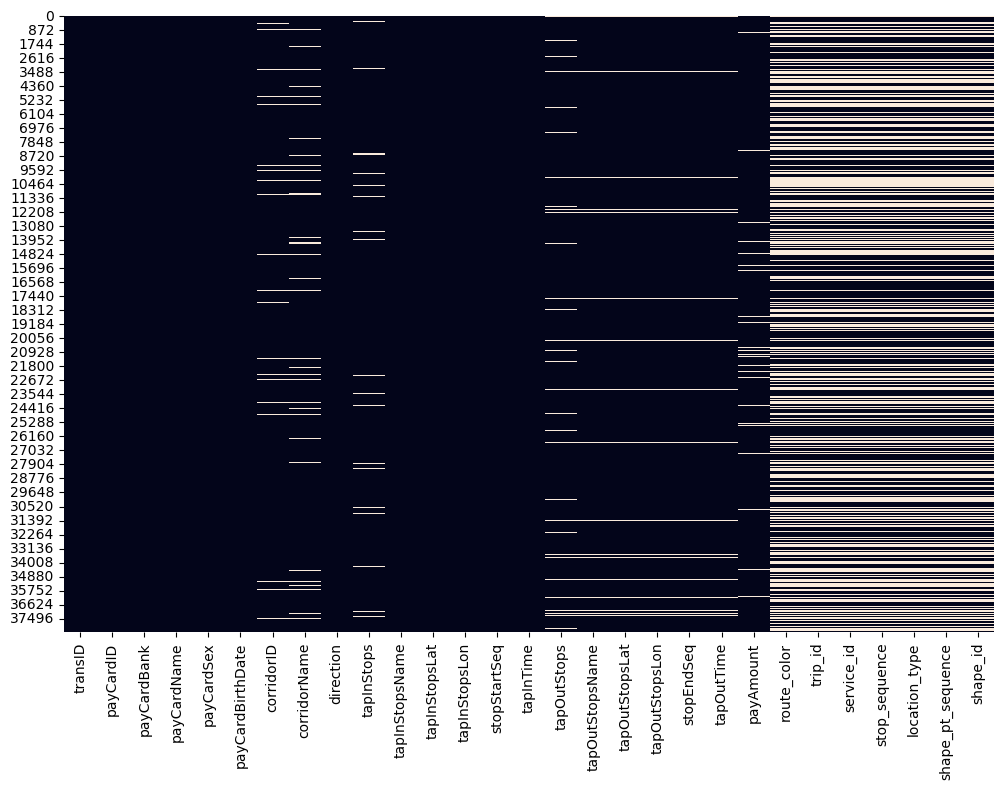

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_df.isna(), cbar=False)
plt.show()

## **3.2. Columns Distribution**

### **3.2.1. Numerical Column Distribution**

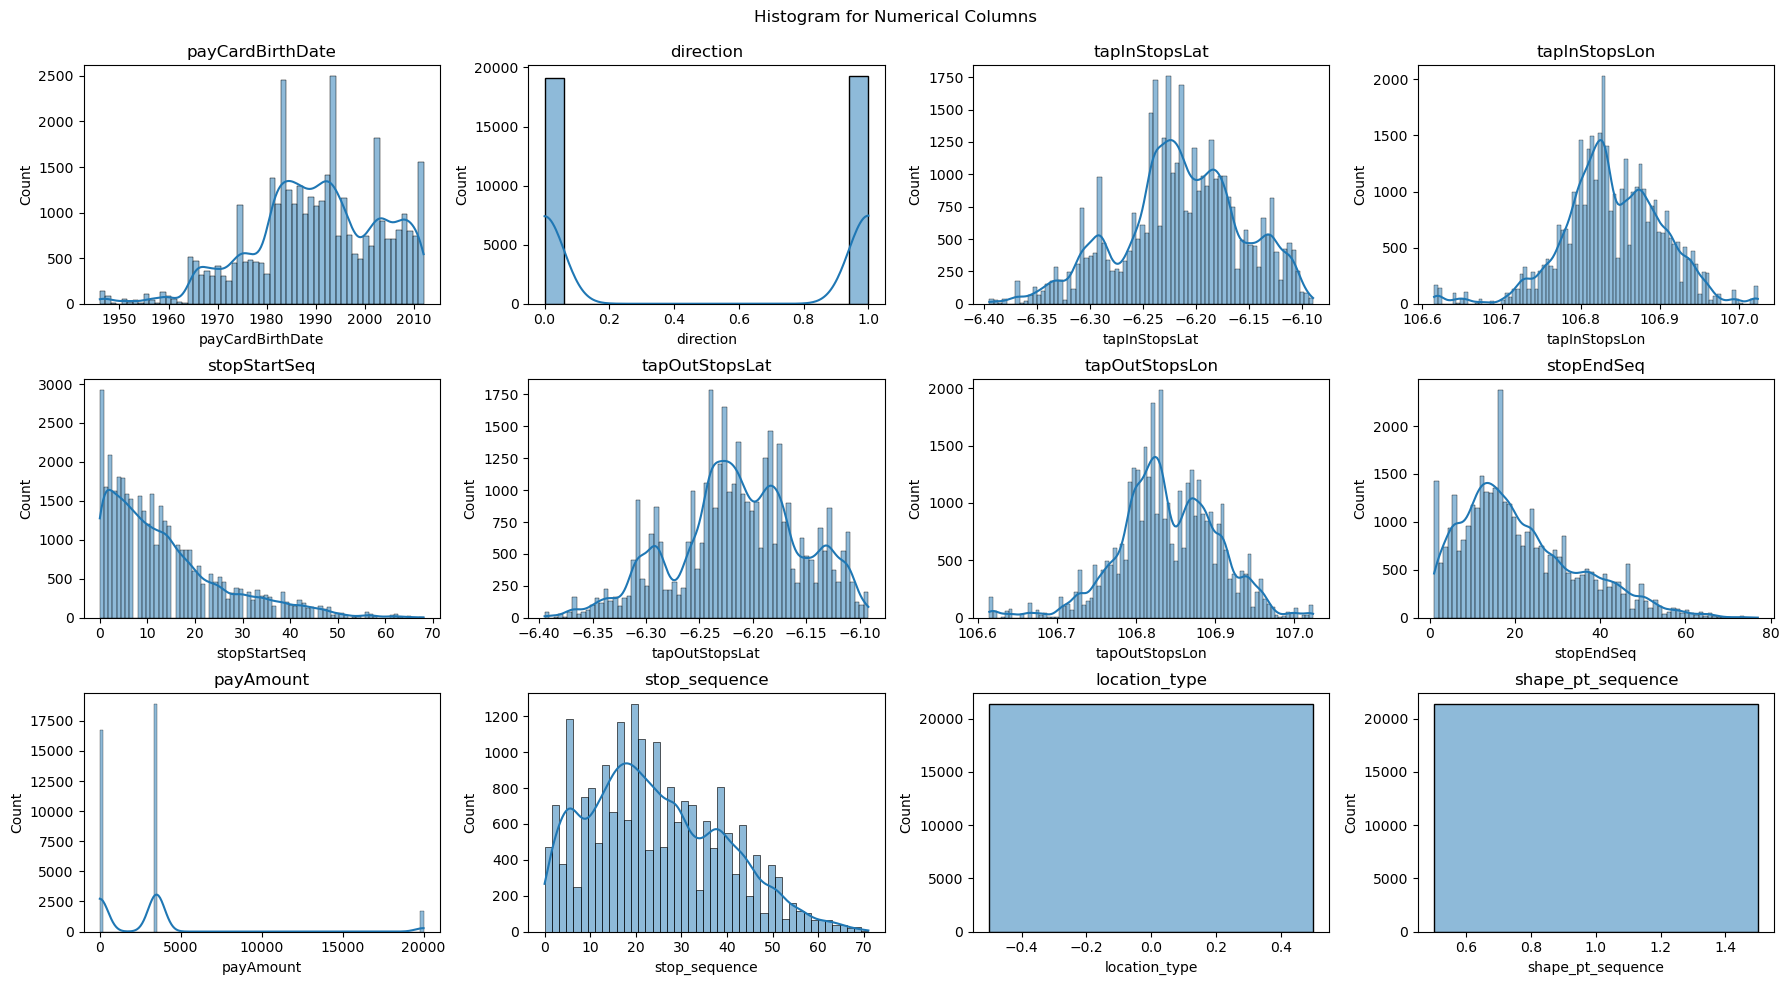

In [14]:
numerical_columns = data_df.select_dtypes(include='number').drop(columns='payCardID', axis=1)

fig, axes = plt.subplots(3, 4, figsize=(18, 10))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.histplot(x=numerical_columns[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Histogram for Numerical Columns")
plt.show()

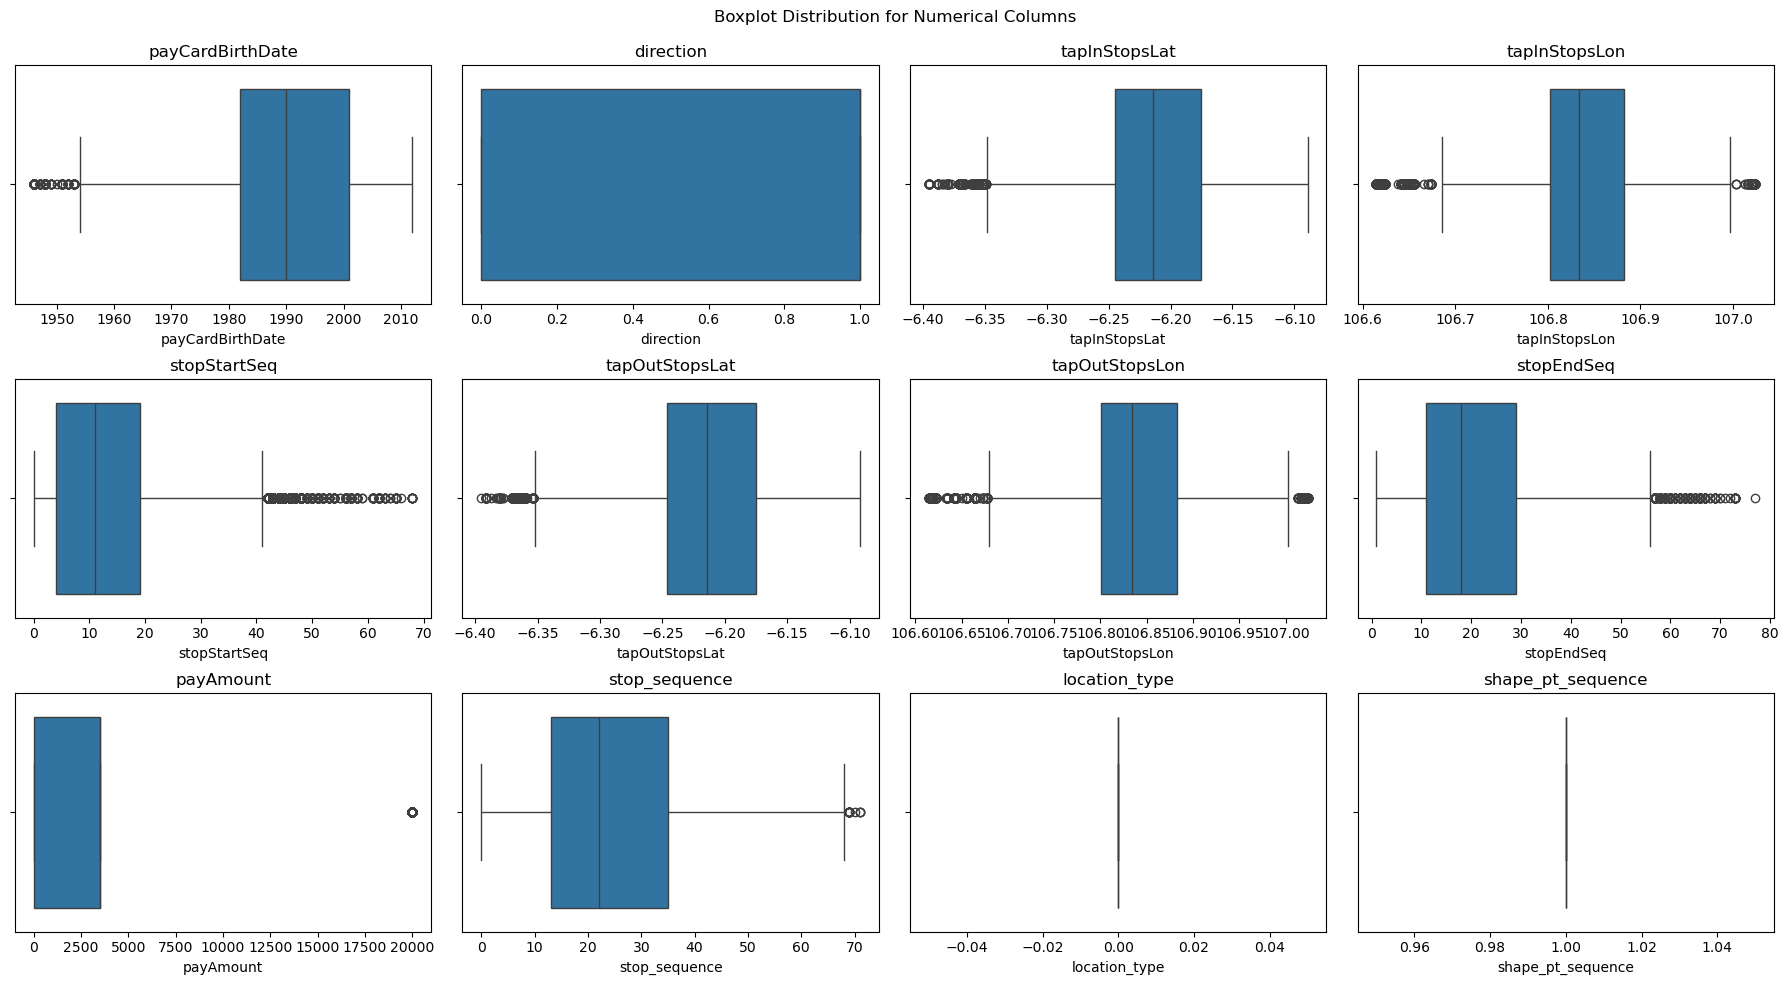

In [15]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.boxplot(x=numerical_columns[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Boxplot Distribution for Numerical Columns")
plt.show()

### **3.2.2. Categorical Column Distribution**

In [16]:
data_df.select_dtypes(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,route_color,trip_id,service_id,shape_id
0,EIIW227B8L34VB,emoney,Bajragin Usada,M,5,Matraman Baru - Ancol,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53,NaN,NaN,NaN,NaN
1,LGXO740D2N47GZ,dki,Gandi Widodo,F,6C,Stasiun Tebet - Karet via Patra Kuningan,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01,NaN,NaN,NaN,NaN
2,DJWR385V2U57TO,dki,Emong Wastuti,F,R1A,Pantai Maju - Kota,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55,D65E62,R1A-R04,SH,nzjj
3,JTUZ800U7C86EH,flazz,Surya Wacana,F,11D,Pulo Gebang - Pulo Gadung 2 via PIK,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16,504F92,11D-R03,SH,ro55
4,VMLO535V7F95NJ,flazz,Embuh Mardhiyah,M,12,Tanjung Priok - Pluit,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03,7ABF7C,12-R05,SH,l3by
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38356,ZWEC949B8Q87QG,brizzi,Kamila Mahendra,F,6B,Ragunan - MH Thamrin via Semanggi,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49,NaN,NaN,NaN,NaN
38357,YHHK837P6Y95GN,dki,Titi Siregar,M,9N,Pinang Ranti - Pramuka,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22,NaN,NaN,NaN,NaN
38358,YXPP627N4G95HO,emoney,drg. Zahra Nashiruddin,F,1T,Cibubur - Balai Kota,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25,NaN,NaN,NaN,NaN
38359,RGVK175U2U98UV,emoney,Ana Agustina,M,JAK.13,Tanah Abang - Jembatan Lima,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50,00609C,JAK.13-R04,SH,JAK.13-R04_shp


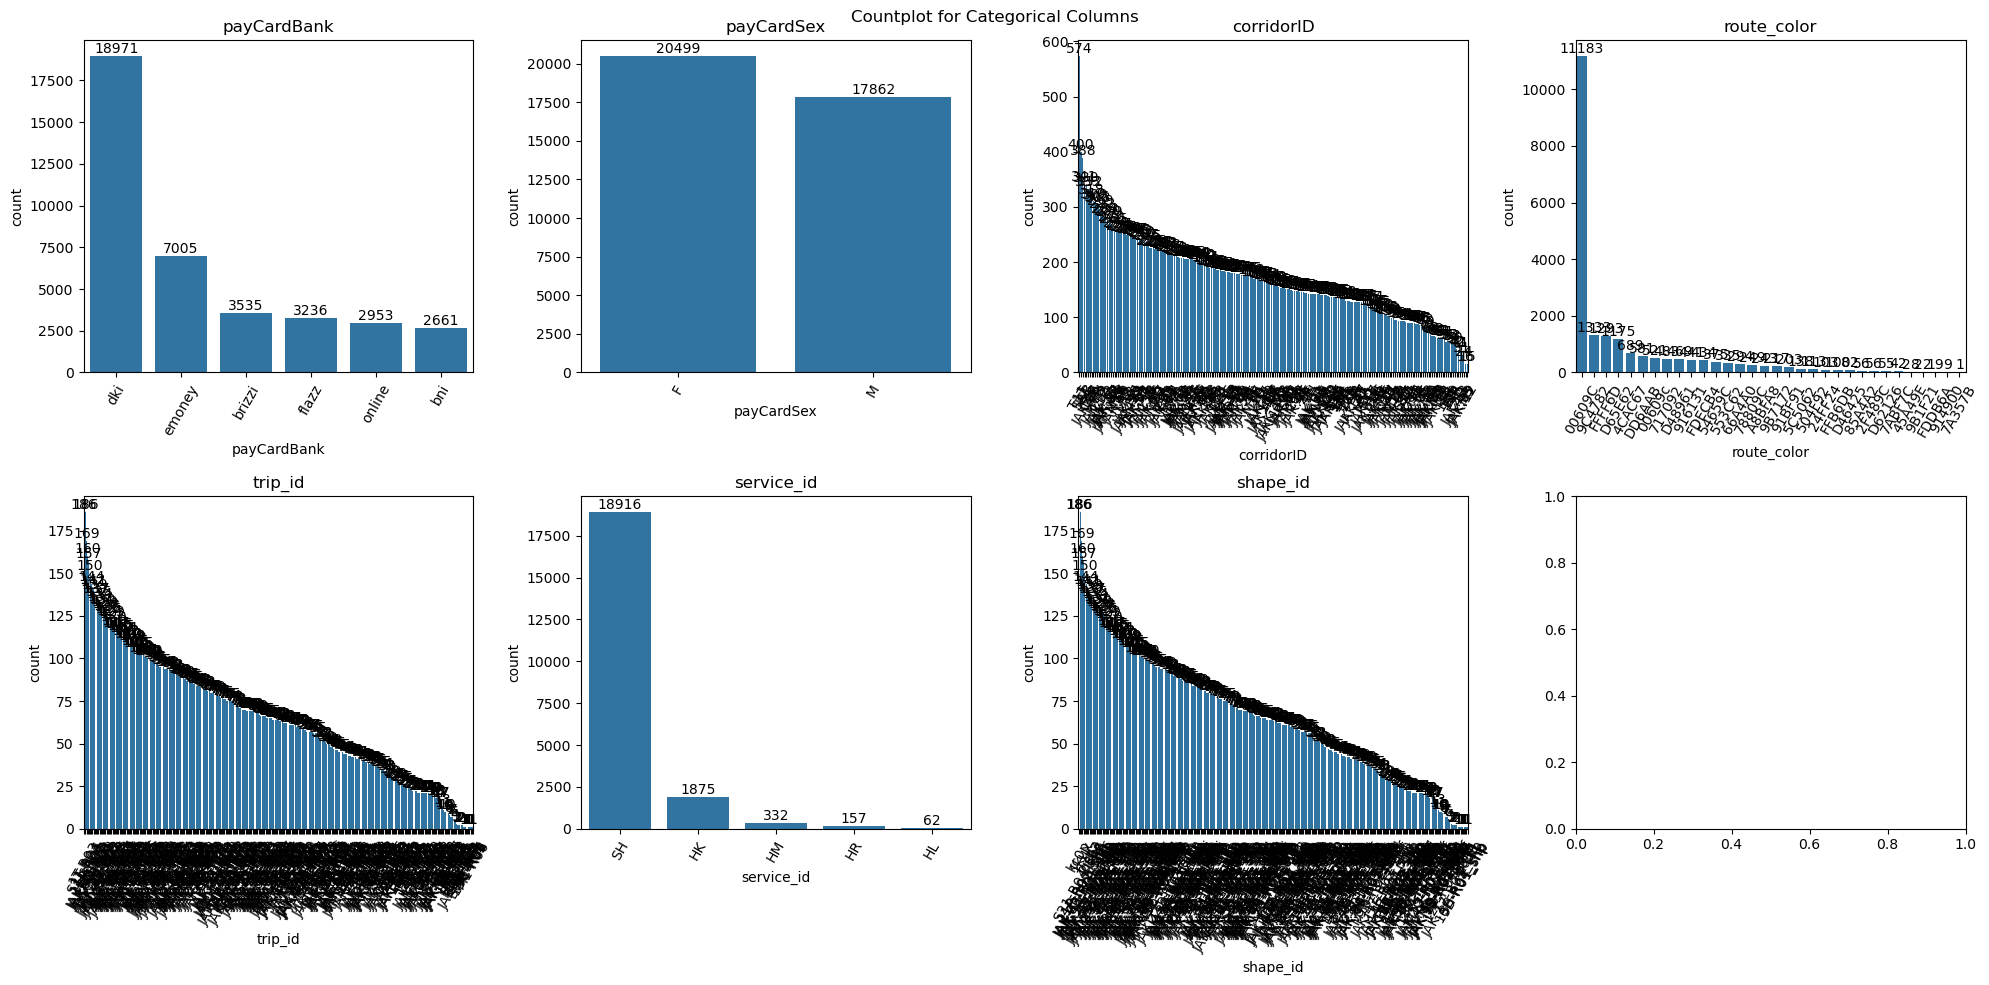

In [17]:
categorical_columns = data_df.select_dtypes(include='object').drop(columns=['transID', 'payCardName', 'corridorName', 'tapInStops', 'tapInStopsName', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutTime'], axis=1)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes = axes.flatten()
for i, col in enumerate(categorical_columns):    
    sns.countplot(x=categorical_columns[col], ax=axes[i], order=categorical_columns[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=60)
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Countplot for Categorical Columns")
plt.show()

# **4. Data Preprocessing**

## **4.1. Missing Value**

### **4.1.1. Columns Drop**

In [18]:
filtered_df = data_df[['shape_pt_sequence', 'stop_sequence', 'shape_id', 'location_type']]

pd.DataFrame({
    'Columns': filtered_df.columns,
    '# of Unique Values': filtered_df.nunique().values,
    '# of Missing Values': [filtered_df[col].isna().sum() for col in filtered_df.columns],
    '5 Unique Values': [filtered_df[col].unique()[:6] for col in filtered_df.columns],
})

,Columns,# of Unique Values,# of Missing Values,5 Unique Values
0,shape_pt_sequence,1,17019,"[nan, 1.0]"
1,stop_sequence,72,17019,"[nan, 39.0, 29.0, 15.0, 6.0, 17.0]"
2,shape_id,330,17019,"[nan, nzjj, ro55, l3by, kc0p, B14-R02_shp]"
3,location_type,1,17019,"[nan, 0.0]"


There are no domain knowledge about these columns and seems to be negligible

In [19]:
data_df = data_df.drop(columns=['shape_pt_sequence', 'stop_sequence', 'shape_id', 'location_type'], axis=1)

### **4.1.2. Manual Imputation**

#### **4.1.2.1. Corridor Attributes**

**Impute missing corridorID attribute based on known corridorID by its tapInStops and corridorName**        
note: one tapInStops can have multiple corridorID, can't solely based on corridorName since the missing value count in this column is 1257 (won't help much) even when the missing value type is MAR

In [20]:
data_df.loc[data_df['corridorID'].notna(), 'corridorID'] = data_df.loc[data_df['corridorID'].notna(), 'corridorID'].apply(lambda x: x[1:] if x[0] == "M" else x)

Based on domain knowledge, the letter 'M' in the corridorID indicates for AMARI (Angkutan Malam Hari) service which operate between 22.00 - 05.00. And as January 1st, AMARI service is no longer using 'M' letter prefix [source](https://news.detik.com/berita/d-7705774/kode-rute-bus-amari-transj-berubah-mulai-1-januari-2025-cek-infonya#:~:text=AMARI%20TransJakarta%20adalah%20singkatan%20Angkutan,operasional%20TransJakarta%20menjadi%2024%20jam.)

Therefore, the prefix 'M' letter is removed

In [21]:
corridor_mapping_df = data_df.groupby(['corridorName', 'corridorID', 'tapInStops']).size().reset_index(name='Count').sort_values(by='tapInStops')

corridor_mapping_df

,corridorName,corridorID,tapInStops,Count
1741,Pasar Minggu - Jagakarsa,JAK.46,B00001P,18
3512,Universitas Indonesia - Lebak Bulus,D21,B00004P,1
582,Depok - BKN,D11,B00005P,6
1489,Lebak Bulus - Petukangan,JAK.32,B00008P,1
155,Blok M - Andara,JAK.31,B00017P,1
...,...,...,...,...
1628,PGC 2 - Grogol 2,9A,P00297,19
1862,Pinang Ranti - Bundaran Senayan,9C,P00297,3
2883,Stasiun Tebet - BNN,5B,P00297,19
1672,Pancoran - Kampung Rambutan,7D,P00297,2


In [22]:
data_df = data_df.merge(
    corridor_mapping_df[['tapInStops', 'corridorName', 'corridorID']],
    on=['tapInStops', 'corridorName'],
    how='left',
    suffixes=('', '_lookup')
)

data_df['corridorID'] = data_df['corridorID'].fillna(data_df['corridorID_lookup'])
data_df = data_df.drop(columns='corridorID_lookup')

**Impute missing corridorName attribute based on known corridorName by its corridorID**

In [23]:
corridor_name_mapping = dict(zip(corridor_mapping_df['corridorID'], corridor_mapping_df['corridorName']))

data_df['corridorName'] = data_df['corridorID'].map(corridor_name_mapping)

#### **4.1.2.2. Route Color**

**Impute missing route_color attribute based on known corridorName by its corridorID**      
note: manual mapping since some prefix number has the same route color name, ex. 5, 5D, 5C have the same route color

In [24]:
route_color_mapping_df = pd.DataFrame({
    "Corridor ID" : ["JAK.88", "JAK.08", "JAK.09", "JAK.10", "JAK.100", "JAK.102", "JAK.105", "JAK.108", "JAK.10A", "JAK.07", "JAK.10B", "JAK.110A", "JAK.112", "JAK.113", "JAK.115", "JAK.117", "JAK.118", "JAK.12", "JAK.120", "JAK.11","JAK.06", "JAK.05", "JAK.04", "JAK.93", "JAK.90", "JAK.89", "JAK.61", "JAK.87", "JAK.86", "JAK.85",
        "JAK.84", "JAK.80", "JAK.77", "JAK.76", "JAK.75", "JAK.74", "JAK.73", "JAK.72", "JAK.71", "JAK.01", "JAK.02", "JAK.03", "JAK.13", "JAK.95", "JAK.14", "JAK.16", "JAK.41", "JAK.42", "JAK.43B", "JAK.43C", "JAK.44", "JAK.45", "JAK.46", "JAK.47", "JAK.40", "JAK.49", "JAK.51", "JAK.52", "JAK.53", "JAK.54", "JAK.56",
        "JAK.58", "JAK.59", "JAK.60", "JAK.50", "JAK.39", "JAK.38", "JAK.37", "JAK.17", "JAK.18", "JAK.19", "JAK.20", "JAK.21", "JAK.22", "JAK.24", "JAK.25", "JAK.26", "JAK.27", "JAK.28", "JAK.29", "JAK.30", "JAK.31", "JAK.32", "JAK.33", "JAK.34", "JAK.35", "JAK.36", "JAK.15", "JAK.98", "JAK.64", "JAK.99", "JAK.48A",
        "JAK.106", "JAK.23", "6B", "6A", "6", "6V", "M2", "M9", "M7", "M6", "M5", "M4", "M3", "M8", "M14", "M1", "M10", "M11", "M12", "M13", "2A", "2", "11", "9C", "9A", "9", "9ST", "6C", "6H", "6D", "6M", "6N", "6Q", "6T", "6U", "6K", "11D", "11Q", "4", "4D", "2B", "2P", "2Q", "4B", "4C", "4F", "4E", "9N", "9D", "9E",
        "9H", "11B", "11M", "11P", "2H", "2F", "2E", "13", "13C", "13D", "L13E", "12", "9F", "7F", "7", "7T", "7R", "7U", "7V", "7Q", "7P", "7E", "7D", "7C", "7B", "7A", "12A", "12B", "12P", "10", "10D", "10H", "14B", "10A", "10B", "1K", "S13", "D31", "6P", "D32", "1T", "S12", "B13", "B14", "S31", "S14", "12F", "12H",
        "12C", "5D", "5C", "5", "5N", "5F", "5B", "5M", "1", "1P", "1B", "R1A", "1C", "1E", "1F", "1H", "1M", "1N", "1A", "1Q", "1R", "8", "8A", "8E", "8D", "8K", "8ST", "8C", "8M", "14A", "14", "3", "3F", "3H", "3E", "SH1", "3B", "3C", "3A", "BW1", "BW10", "BW4", "BW9", "T11", "S21", "T12", "S22", "D21", "TP1", "7W", "B11", "B21", "D11", "S11", "TP2"],
    "Route Color": ["00609C"] * 94 + ["1BAC47"] * 4 + ["24FF24"] * 14 + ["2F489C"] * 2 + ["312F92"] + ["45A49E"] * 4 + ["4CAC67"] * 9 + ["504F92"] * 2 + ["512C62"] * 2 + 
        ["54659C"] * 3 + ["553C62"] * 3 + ["5C5062"] + ["66A4A0"] * 4 + ["717092"] * 3 + ["78809C"] * 3 + ["7A357B"] * 4 + ["7ABF7C"] + ["85A4A2"] + ["914900"] * 2 +
        ["916131"] * 11 + ["91BF91"] * 3 + ["9B1F21"] * 3 + ["9B474A"] + ["9B7172"] * 2 + ["9C4782"] * 11 +["A8BFA8"] * 3 +["D46425"] * 3 +["D48961"] * 4 + ["D62126"] +
        ["D65E62"] * 11 + ["DD3393"] * 2 + ["DD6AAB"] * 6 + ["F5AB6E"] * 2 + ["FDCB1C"] * 3 + ["FDDB6A"] * 2 + ["FDECB4"] * 3 + ["FFB6DB"] * 4 + ["FFFF6D"] * 13
})
route_color_mapping_df

,Corridor ID,Route Color
0,JAK.88,00609C
1,JAK.08,00609C
2,JAK.09,00609C
3,JAK.10,00609C
4,JAK.100,00609C
5,JAK.102,00609C
6,JAK.105,00609C
7,JAK.108,00609C
8,JAK.10A,00609C
9,JAK.07,00609C


In [25]:
route_color_mapping = route_color_mapping_df.set_index('Corridor ID')['Route Color'].to_dict()
data_df['route_color'] = data_df['corridorID'].map(route_color_mapping)

#### **4.1.2.3. Service ID**

**Impute missing service_id attribute based on known service_id by its corridorID**

In [26]:
service_id_mapping_df = pd.DataFrame({
    "Corridor ID" : data_df['corridorID'].dropna().unique(),
    "Service ID": [next(iter(data_df.loc[data_df['corridorID'] == cor_id, 'service_id'].dropna()), None) for cor_id in data_df['corridorID'].dropna().unique()]
})
service_id_mapping_df

,Corridor ID,Service ID
0,5,SH
1,6C,SH
2,R1A,SH
3,11D,SH
4,12,SH
5,1T,HK
6,JAK.18,SH
7,B14,HK
8,1Q,SH
9,5M,SH


In [27]:
service_id_mapping = dict(zip(service_id_mapping_df['Corridor ID'], service_id_mapping_df['Service ID']))
data_df['service_id'] = data_df['corridorID'].map(service_id_mapping)

#### **4.1.2.4. Trip ID**

**Impute missing trip_id attribute based on known trip_id by its direction, CorridorID, and service_id**        

In [28]:
data_df.loc[data_df['trip_id'].notna(), 'trip_id'] = data_df.loc[data_df['trip_id'].notna(), 'trip_id'].apply(lambda x: x[1:] if x[0] == "M" else x)

Trip ID holds the value of CorridorID-Direction. Again, there are some records with prefix 'M' letter to indicates the AMARI services. These prefix 'M' letters are also removed.

In [29]:
trip_id_mapping_df = data_df.groupby(['trip_id', 'service_id', 'direction', 'corridorID']).size().reset_index(name='Count')
trip_id_mapping_df

,trip_id,service_id,direction,corridorID,Count
0,1-R05,SH,0.0,1,3
1,1-R06,SH,1.0,1,1
2,1-R07,SH,0.0,1,35
3,1-R08,SH,1.0,1,20
4,10-R02,SH,1.0,10,35
5,10A-R03,SH,0.0,10A,30
6,10A-R04,SH,1.0,10A,61
7,10B-R01,SH,0.0,10B,61
8,10B-R02,SH,1.0,10B,65
9,10D-R01,HK,0.0,10D,21


In [30]:
trip_id_mapping_df[trip_id_mapping_df.duplicated(subset=['service_id', 'direction', 'corridorID'])]

,trip_id,service_id,direction,corridorID,Count
2,1-R07,SH,0.0,1,35
3,1-R08,SH,1.0,1,20
21,12-R05,SH,0.0,12,42
36,1A-R11,HL,1.0,1A,62
111,7-R10,SH,1.0,7,9
216,JAK.23-R03,SH,0.0,JAK.23,69
326,T11-R01C,HM,0.0,T11,52
328,T11-R03C,HM,1.0,T11,105
329,T11-R04,HM,0.0,T11,70
330,T11-R05,HM,1.0,T11,105


In [31]:
trip_id_mapping_df[((trip_id_mapping_df['trip_id'].str.contains("1", na=False)) & (trip_id_mapping_df['corridorID'] == "1")) |
                   ((trip_id_mapping_df['trip_id'].str.contains("1A", na=False)) & (trip_id_mapping_df['corridorID'] == "1A")) |
                   ((trip_id_mapping_df['trip_id'].str.contains("JAK.23", na=False)) & (trip_id_mapping_df['corridorID'] == "JAK.23")) |
                   ((trip_id_mapping_df['trip_id'].str.contains("12", na=False)) & (trip_id_mapping_df['corridorID'] == "12")) |
                   ((trip_id_mapping_df['trip_id'].str.contains("7", na=False)) & (trip_id_mapping_df['corridorID'] == "7")) |
                   ((trip_id_mapping_df['trip_id'].str.contains("T11", na=False)) & (trip_id_mapping_df['corridorID'] == "T11"))].sort_values(by=['corridorID', 'direction'])

,trip_id,service_id,direction,corridorID,Count
0,1-R05,SH,0.0,1,3
2,1-R07,SH,0.0,1,35
1,1-R06,SH,1.0,1,1
3,1-R08,SH,1.0,1,20
20,12-R03,SH,0.0,12,18
21,12-R05,SH,0.0,12,42
34,1A-R09,HL,0.0,1A,4
35,1A-R10,HL,1.0,1A,62
36,1A-R11,HL,1.0,1A,62
110,7-R06,SH,1.0,7,36


Based on the filtered dataframe above, seen that there are many duplicates for the combination of service id, direction, and the corridor id. Therefore, trip id with the duplications of the combination will be updated into:     
- 1-R07 : 1-R05
- 1-R08 : 1-R06
- 12-R05 : 12-R03
- 1A-R11 : 1A-R10
- 7-R10 : 7-R06
- JAK.23-R03 : JAK.23-R01
- T11-R01C, T11-R04 : T11-R01
- T11-R03, T11-R03C, T11-R05 : T11-R02

In [32]:
def updateDuplicatedTripID(x):
    if x == "1-R07": return "1-R05"
    elif x == "1-R08": return "1-R06"
    elif x == "12-R05": return "12-R03"
    elif x == "1A-R11": return "1A-R10"
    elif x == "7-R10": return "7-R06"
    elif x == "JAK.23-R03": return "JAK.23-R01"
    elif x == "T11-R01C" or x == "T11-R04": return "T11-R01"
    elif x == "T11-R03" or x == "T11-R03C" or x == "T11-R05": return "T11-R02"
    else: return x

data_df['trip_id'] = data_df['trip_id'].apply(updateDuplicatedTripID)

trip_id_mapping_df = data_df.groupby(['trip_id', 'service_id', 'direction', 'corridorID']).size().reset_index(name='Count')
trip_id_mapping_df

,trip_id,service_id,direction,corridorID,Count
0,1-R05,SH,0.0,1,38
1,1-R06,SH,1.0,1,21
2,10-R02,SH,1.0,10,35
3,10A-R03,SH,0.0,10A,30
4,10A-R04,SH,1.0,10A,61
5,10B-R01,SH,0.0,10B,61
6,10B-R02,SH,1.0,10B,65
7,10D-R01,HK,0.0,10D,21
8,10H-R04,SH,1.0,10H,1
9,11-R03,SH,0.0,11,2


In [33]:
data_df = data_df.merge(
    trip_id_mapping_df[['corridorID', 'service_id', 'direction', 'trip_id']],
    on=['corridorID', 'service_id', 'direction'],
    how='left',
    suffixes=('', '_lookup')
)

data_df['trip_id'] = data_df['trip_id'].fillna(data_df['trip_id_lookup'])
data_df = data_df.drop(columns='trip_id_lookup')

#### **4.1.2.5. Pay Amount**

**Impute missing payAmount attribute based on known corridorID**        
note: for these corridors (3H, JAK.48A, JAK.48B) pay amount is manually inputted based on domain knowledge since it's not provided       
- 3H: 3500
- JAK.48A: 0
- JAK.48B: 0

In [34]:
records_to_add = pd.DataFrame({
    'corridorID': ['3H', 'JAK.48A', 'JAK.48B'],
    'payAmount': [3500, 0, 0],
    'Count': [0, 0, 0]
})

pay_amount_mapping_df = data_df.groupby(['corridorID', 'payAmount']).size().reset_index(name='Count')
pay_amount_mapping_df = pd.concat([pay_amount_mapping_df, records_to_add], ignore_index=True)
pay_amount_mapping_df.sort_values(by='corridorID')

,corridorID,payAmount,Count
0,1,3500.0,299
1,10,3500.0,361
2,10A,0.0,148
3,10B,0.0,140
4,10D,3500.0,166
5,10H,3500.0,129
6,10K,3500.0,138
7,11,3500.0,254
8,11B,0.0,95
9,11C,0.0,57


In [35]:
pay_amount_mapping = dict(zip(pay_amount_mapping_df['corridorID'], pay_amount_mapping_df['payAmount']))
data_df['payAmount'] = data_df['corridorID'].map(pay_amount_mapping)

#### **4.1.2.6. Tap Out Stops**

**Impute missing tapOutStops attribute based on known tapOutStopsName**        

In [36]:
tap_out_stops_mapping_df = data_df.groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
tap_out_stops_mapping_df.sort_values(by='tapOutStops')

,tapOutStops,tapOutStopsName,Count
0,B00002P,ABA,2
1,B00003P,Acacia Residence,1
2,B00004P,ACC Simatupang,1
3,B00005P,ACE Hardware,1
4,B00013P,Ahmad Yani Pisangan Baru,1
...,...,...,...
2225,P00293,Sawah Besar Arah Utara,1
2226,P00294,Sawah Besar Arah Selatan,22
2227,P00295,Mangga Besar Arah Utara,8
2228,P00297,BNN LRT,107


In [37]:
pay_amount_mapping = dict(zip(tap_out_stops_mapping_df['tapOutStopsName'], tap_out_stops_mapping_df['tapOutStops']))
data_df['tapOutStops'] = data_df['tapOutStopsName'].map(pay_amount_mapping)

### **4.1.3. Cleaned Data**

In [38]:
cleaned_isna_df = pd.DataFrame(data_df.isna().sum()).reset_index()

cleaned_isna_df = pd.DataFrame({
    "Columns": cleaned_isna_df[cleaned_isna_df[0] > 0]['index'],
    "# of missing values": cleaned_isna_df[cleaned_isna_df[0] > 0][0],
    "% of missing values": cleaned_isna_df[cleaned_isna_df[0] > 0][0] / data_df.shape[0] * 100
}).sort_values(by="% of missing values", ascending=False)

cleaned_isna_df

,Columns,# of missing values,% of missing values
23,trip_id,10286,26.813691
24,service_id,8287,21.602669
22,route_color,2522,6.574385
15,tapOutStops,1364,3.555695
16,tapOutStopsName,1344,3.503558
17,tapOutStopsLat,1344,3.503558
18,tapOutStopsLon,1344,3.503558
19,stopEndSeq,1344,3.503558
20,tapOutTime,1344,3.503558
9,tapInStops,1226,3.195954


In [39]:
print(f" Fixed missing value count: {isna_df['# of missing values'].sum() - cleaned_isna_df['# of missing values'].sum()}\n",
      f"New missing value count: {cleaned_isna_df['# of missing values'].sum()}")

 Fixed missing value count: 99759
 New missing value count: 33816


## **4.2. Duplicated Value**

In [40]:
data_df.duplicated().sum()

461

In [41]:
data_df[data_df.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,route_color,trip_id,service_id
21,MEFW094B7A84RS,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,RS Harapan Kita Arah Utara,-6.184489,106.796740,6,2023-04-03 05:13:08,B05720P,Term. Poris Plawad,-6.172859,106.665010,24.0,2023-04-03 06:08:59,3500.0,FFFF6D,T11-R02,HM
22,MEFW094B7A84RS,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,RS Harapan Kita Arah Utara,-6.184489,106.796740,6,2023-04-03 05:13:08,B05720P,Term. Poris Plawad,-6.172859,106.665010,24.0,2023-04-03 06:08:59,3500.0,FFFF6D,T11-R02,HM
422,NOBN339Q2M17LT,213136570183140,emoney,drg. Gawati Maryadi,M,1992,JAK.23,Senen - Pisangan Baru,0.0,B06428P,Jln. Galur Sari Barat 2,-6.200101,106.864719,34,2023-04-03 17:38:42,B06431P,SDN Utan Kayu Selatan 23 Pagi,-6.203858,106.870780,37.0,2023-04-03 18:40:44,0.0,00609C,JAK.23-R01,SH
624,DDVH711Y8Y43IF,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,RS Harapan Kita Arah Utara,-6.184489,106.796740,6,2023-04-04 06:17:18,B05720P,Term. Poris Plawad,-6.172859,106.665010,24.0,2023-04-04 07:13:12,3500.0,FFFF6D,T11-R02,HM
625,DDVH711Y8Y43IF,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,RS Harapan Kita Arah Utara,-6.184489,106.796740,6,2023-04-04 06:17:18,B05720P,Term. Poris Plawad,-6.172859,106.665010,24.0,2023-04-04 07:13:12,3500.0,FFFF6D,T11-R02,HM
1025,MRBK931W6P46BV,213136570183140,emoney,drg. Gawati Maryadi,M,1992,JAK.23,Senen - Pisangan Baru,0.0,B06428P,Jln. Galur Sari Barat 2,-6.200101,106.864719,34,2023-04-04 17:46:40,B06431P,SDN Utan Kayu Selatan 23 Pagi,-6.203858,106.870780,37.0,2023-04-04 19:23:41,0.0,00609C,JAK.23-R01,SH
1227,CEFX108D9S35VP,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,RS Harapan Kita Arah Utara,-6.184489,106.796740,6,2023-04-05 06:52:50,B05720P,Term. Poris Plawad,-6.172859,106.665010,24.0,2023-04-05 07:16:54,3500.0,FFFF6D,T11-R02,HM
1228,CEFX108D9S35VP,378872365541693,emoney,Aslijan Irawan,F,2009,T11,Poris Plawad - Bundaran Senayan,1.0,P00206,RS Harapan Kita Arah Utara,-6.184489,106.796740,6,2023-04-05 06:52:50,B05720P,Term. Poris Plawad,-6.172859,106.665010,24.0,2023-04-05 07:16:54,3500.0,FFFF6D,T11-R02,HM
1489,PYDC565L2G47IT,2715637868237109,dki,Sutan Bahuwarna Uyainah,M,1996,JAK.23,Senen - Pisangan Baru,0.0,B06427P,Jln. Kemuning Raya 1,-6.197144,106.864674,33,2023-04-05 06:24:19,B06432P,Jln. Rasamala,-6.206328,106.871422,38.0,2023-04-05 06:59:06,0.0,00609C,JAK.23-R01,SH
1629,OKXQ278N1M72KS,213136570183140,emoney,drg. Gawati Maryadi,M,1992,JAK.23,Senen - Pisangan Baru,0.0,B06428P,Jln. Galur Sari Barat 2,-6.200101,106.864719,34,2023-04-05 16:23:30,B06431P,SDN Utan Kayu Selatan 23 Pagi,-6.203858,106.870780,37.0,2023-04-05 17:55:22,0.0,00609C,JAK.23-R01,SH


In [42]:
data_df = data_df.drop_duplicates()

# **5. Data Analysis**

## **5.1. Related to Bus Corridor**

In [43]:
# Soon to be deleted
# Format :: Station Name ; long, lat

locations_raw = """
Pulo Gadung 5 ; -6.182027331354814, 106.90908582764911
Warung Jengkol ; -6.182128001263599, 106.91196346920538
Jln. Kesadaran Pool Bus 1 ; -6.182202666362238, 106.91318655648485
Jln. Kesadaran Pool Bus 2 ; -6.182309330771153, 106.91516066234283
Sbr. PTC Pulo Gadung ; -6.182373329405841, 106.91670561469584
Sbr. IGI ; -6.182533325958651, 106.9188835683602
Jln. Gg. Swadaya IV ; -6.182938356360592, 106.92328683459259
Al-Wathoniyah ; -6.183623008966146, 106.92374489923606 
Jln. Swadaya IVJln. Swadaya IV ; -6.1864336013911885, 106.92351422926669
Jln. Radjiman Widyodiningrat ; -6.18932733414608, 106.92398518478134
Jln. Radjiman 2 ; -6.190299999617736, 106.92364477737942
Jln. Yamaha Pintu II ; -6.192580000306155, 106.92351445594568
Pasar Pulo Jaya ; -6.194696206722979, 106.92327110382563
Pangarengan ; -6.200206506164078, 106.92281166203645
Masjid Al-Marzuqiyah ; -6.2033593375531675, 106.92329477737972
Jln. Anggrek Raya ; -6.204969903289348, 106.9240136093773
Seberang Jln. Rawabadung ; -6.2075190668105105, 106.92336987923021
Gg. H. Sayuti 1 ; -6.212868243169906, 106.92438783875205
Carrefour Buaran ; -6.218489101391211, 106.9241732620435
SMKN 48 ; -6.21908734555958, 106.92399259087217
Budhaya Santo Agustinus ; -6.220655200519561, 106.9248938130781
Kasi Dikdas 2 ; -6.2219137474039785, 106.92355270861076
Gedung Senam ; -6.2239188836615265, 106.92466850753569
Wira Purusa ; -6.23203801597244, 106.92309060806602
Rukan Radin Inten II ; -6.234992332573416, 106.92323008293123
Masjid An Nur Khadijah ; -6.236090864826904, 106.92373433821311
Kwk Unkermil Timur II ; -6.2455440073026365, 106.92048372711011
Simpang Radin Inten II Kalimalang ; -6.2472918610729495, 106.92066310066419
Pondok Kelapa Indah ; -6.247259865704537, 106.92219732418144
Curug Kalimalang ; -6.247483833257786, 106.92486880441133
Kav Marinir Kalimalang ; -6.247793121604724, 106.92669270649478
Billy Moon 2 ; -6.247931768056049, 106.92975042487721
Billy Moon ; -6.2481130748850395, 106.9310486140072
Pondok Kelapa Raya Kalimalang ; -6.248752980847462, 106.93576930183224
Jln. Klp. Hijau ; -6.248944952488042, 106.939706784623
Jln. Inspeksi Kalimalang Lampiri ; -6.249780017660348, 106.93966664245332
Jln. Pondok Kelapa Selatan ; -6.249278759047339, 106.93600810945064
Kapin ; -6.248660183924429, 106.93025745330458
Embun Pagi Islamic Elementary School ; -6.2485641980659405, 106.9293884175629
Sekolah Pami Jaya ; -6.24835089609568, 106.92597664772067
Jln. Curug Raya Kalimalang ; -6.248062938286481, 106.92339099822895
Sbr. Pondok Kelapa Indah 2 ; -6.24742669136355, 106.9228227945735
Sbr. Pondok Kelapa Indah ; -6.2475100169686355, 106.92166186203664
SMK Swadaya Global School ; -6.246957356297844, 106.9200925908725
SPBU Raden Intan II ; -6.241596688994446, 106.92111550621568
Taman Duren Sawit ; -6.2402102061584745, 106.92220984746575
Simpang Jln. 26 Selatan ; -6.238183801568439, 106.92279993343392
Simpang Jln. 26 Utara ; -6.238092209058374, 106.92243782796795
Sbr. Rukan Radin Inten II ; -6.235287732977283, 106.9229984853732
Sbr. Wira Purusa ; -6.232063469336524, 106.92332706927962
Jln. H. Aman ; -6.226733480436222, 106.92319683667954
Wisma Atlet Radin Inten ; -6.223176015914754, 106.92370643875222
Kasi Dikdas 1 ; -6.222232006170039, 106.92358769272278
Dinas Kebersihan Duren Sawit ; -6.219542685962025, 106.92375550621549
Sbr. Gg. H. Sayuti I ; -6.212535345569104, 106.92401425224462
Jln. Rawabadung ; -6.208791626369176, 106.92315594538181
Sbr. Jln. Anggrek Raya ; -6.204994550556405, 106.92300574168192
Rajiman 2 ; -6.199995539193063, 106.92263330473045
Pulo Jaya ; -6.1949786151636355, 106.92241292284262
Jln. Radjiman 1 ; -6.190180244657396, 106.92334093254054
SDN Rawa Terate ; -6.1879279617613845, 106.92353028670004
Sbr. Al-Wathoniyah ; -6.183920891481897, 106.92402395999788
IGI ; -6.18288550258188, 106.91911427751448
PTC Pulo Gadung 1 ; -6.182644160120528, 106.91656159543501
Makam Wakaf ; -6.18249789609894, 106.91151048574686

"""

# Convert into list of dictionaries
location_list = []
for line in locations_raw.strip().split("\n"):
    name, coords = line.split(" ; ")
    lat, lon = map(float, coords.split(", "))
    location_list.append({'lat': lat, 'lon': lon, 'name': name})

print(location_list)

[{'lat': -6.182027331354814, 'lon': 106.90908582764911, 'name': 'Pulo Gadung 5'}, {'lat': -6.182128001263599, 'lon': 106.91196346920538, 'name': 'Warung Jengkol'}, {'lat': -6.182202666362238, 'lon': 106.91318655648485, 'name': 'Jln. Kesadaran Pool Bus 1'}, {'lat': -6.182309330771153, 'lon': 106.91516066234283, 'name': 'Jln. Kesadaran Pool Bus 2'}, {'lat': -6.182373329405841, 'lon': 106.91670561469584, 'name': 'Sbr. PTC Pulo Gadung'}, {'lat': -6.182533325958651, 'lon': 106.9188835683602, 'name': 'Sbr. IGI'}, {'lat': -6.182938356360592, 'lon': 106.92328683459259, 'name': 'Jln. Gg. Swadaya IV'}, {'lat': -6.183623008966146, 'lon': 106.92374489923606, 'name': 'Al-Wathoniyah'}, {'lat': -6.1864336013911885, 'lon': 106.92351422926669, 'name': 'Jln. Swadaya IVJln. Swadaya IV'}, {'lat': -6.18932733414608, 'lon': 106.92398518478134, 'name': 'Jln. Radjiman Widyodiningrat'}, {'lat': -6.190299999617736, 'lon': 106.92364477737942, 'name': 'Jln. Radjiman 2'}, {'lat': -6.192580000306155, 'lon': 106.923

In [44]:
def get_route_color(corr_id):
    try:
        return f"#{route_color_mapping_df.loc[route_color_mapping_df['Corridor ID'] == corr_id, 'Route Color'].values[0]}"
    except IndexError:
        return '#FF0000'

### **5.1.1. Most Crowded Corridor**

In [45]:
top_ten_corridor_id = data_df['corridorID'].value_counts()[:10]

top_ten_corridor_df = pd.DataFrame({
    'Count': top_ten_corridor_id.values,
    'Corridor ID': top_ten_corridor_id.index.tolist(),
    'Corridor Name': data_df['corridorName'].value_counts()[:10].index.tolist(),
    'Route Color': [get_route_color(corr_id) for corr_id in data_df['corridorID'].value_counts()[:10].index.tolist()],
    'Stops Coordinates': [
        [{'lat': -6.230274688007395, 'lon': 106.72356489539253, 'name': 'Puri Beta 2'}, {'lat': -6.230460539141339, 'lon': 106.72603606684919, 'name': 'Puri Beta 1'}, {'lat': -6.2364554204013505, 'lon': 106.7479098679893, 'name': 'Petukangan D\'MASIV'}, {'lat': -6.2360422923749494, 'lon': 106.75486592973408, 'name': 'JORR'}, {'lat': -6.237539596243188, 'lon': 106.76065459125006, 'name': 'Swadarma ParagonCorp'}, {'lat': -6.237694079145785, 'lon': 106.76549747495133, 'name': 'Cipulir'}, {'lat': -6.237943598460029, 'lon': 106.77124320777077, 'name': 'Seskoal'}, {'lat': -6.238121252904432, 'lon': 106.77766894862194, 'name': 'Kebayoran Lama'}, {'lat': -6.23914527436402, 'lon': 106.78558253064851, 'name': 'Velbak'}, {'lat': -6.241611152319386, 'lon': 106.79070535103543, 'name': 'Mayestik'}, {'lat': -6.239917965611435, 'lon': 106.79842538013928, 'name': 'CSW 1'}, {'lat': -6.239238605820767, 'lon': 106.80759981761894, 'name': 'Pasar Santa'}, {'lat': -6.238715357239217, 'lon': 106.81633655676964, 'name': 'Rawa Barat'}, {'lat': -6.240036679960083, 'lon': 106.83095649909761, 'name': 'Tegal Mampang'}],
        [{'lat': -6.368426640033561, 'lon': 106.89357046655714, 'name': 'Cibubur Junction'}, {'lat': -6.22204865602163, 'lon': 106.8140741549171, 'name': 'Komdak 1'}, {'lat': -6.216598676088006, 'lon': 106.81538926840888, 'name': 'Benhil 2'}, {'lat': -6.21583934158528, 'lon': 106.8162641665565, 'name': 'Benhil 3'}, {'lat': -6.212834616615287, 'lon': 106.81947132793348, 'name': 'Karet Sudirman 2'}, {'lat': -6.211976011155793, 'lon': 106.82001437026135, 'name': 'Karet Sudirman 3'}, {'lat': -6.210683878884303, 'lon': 106.820599026081, 'name': 'Grand Sahid'}, {'lat': -6.20696339473762, 'lon': 106.82180814513012, 'name': 'Menara Astra'}, {'lat': -6.20458577196288, 'lon': 106.82204056655642, 'name': 'Dukuh Atas 4'}, {'lat': -6.201674601191982, 'lon': 106.82297128745776, 'name': 'St. Sudirman 2'}, {'lat': -6.198492008790761, 'lon': 106.82299145491712, 'name': 'Tosari 2'}, {'lat': -6.19355933439259, 'lon': 106.82275708190059, 'name': 'Plaza Indonesia'}, {'lat': -6.188130703356203, 'lon': 106.822794962637, 'name': 'MH Thamrin 2'}, {'lat': -6.185179270271392, 'lon': 106.82311434905094, 'name': 'Menara Thamrin'}, {'lat': -6.182587400433676, 'lon': 106.82299304948415, 'name': 'Bank Indonesia 2'}, {'lat': -6.180145130068794, 'lon': 106.82640794502365, 'name': 'IRTI'}, {'lat': -6.180473329018278, 'lon': 106.82857655666805, 'name': 'Balai Kota 1'}],
        [{'lat': -6.338603412486121, 'lon': 106.74973947211443, 'name': 'Pool BMP Ciputat'}, {'lat': -6.331140116323728, 'lon': 106.74852381398902, 'name': 'Pool PPD Ciputat'}, {'lat': -6.319726622024844, 'lon': 106.74595427529445, 'name': 'SMK Darussalam'}, {'lat': -6.315203527889106, 'lon': 106.74677595491762, 'name': 'Baileys Lagoon City'}, {'lat': -6.311909372895132, 'lon': 106.75227999724554, 'name': 'Pusdiklat Kemenag 1'}, {'lat': -6.310135389324576, 'lon': 106.75503072608143, 'name': 'Polsek Ciputat 1'}, {'lat': -6.308253236570271, 'lon': 106.75600345334135, 'name': 'Jln. Pesanggrahan'}, {'lat': -6.307501632385343, 'lon': 106.75604912877829, 'name': 'Kampus Uin 1'}, {'lat': -6.305536583777654, 'lon': 106.75742897382825, 'name': 'Jln. Wr Supratman'}, {'lat': -6.3005307609560655, 'lon': 106.76207364373452, 'name': 'Jln. Pahlawan'}, {'lat': -6.297248953362651, 'lon': 106.7649918840078, 'name': 'Komplek Mandiri Giant Express 1'}, {'lat': -6.295967667385048, 'lon': 106.76548923876544, 'name': 'UMJ 1'}, {'lat': -6.293726414171045, 'lon': 106.76501276479141, 'name': 'Jln. Sandratex 1'}, {'lat': -6.286425204713096, 'lon': 106.77117116867763, 'name': 'Selapa Polri'}, {'lat': -6.282805152314946, 'lon': 106.7718660352734, 'name': 'MTsN 3 Jakarta'}, {'lat': -6.281830061276135, 'lon': 106.77320437026158, 'name': 'RA Kartini'}, {'lat': -6.284229549563891, 'lon': 106.77525357794893, 'name': 'Jl Niaga Hijau 1'}, {'lat': -6.287023606404606, 'lon': 106.77967385840597, 'name': 'JPO Barat Pondok Indah 1'}, {'lat': -6.283930947215363, 'lon': 106.78008155417628, 'name': 'Sbr. Pondok Indah Plaza'}, {'lat': -6.274077284020715, 'lon': 106.782788014804, 'name': 'Sbr. Jln. Metro Kencana IV'}, {'lat': -6.265642518467904, 'lon': 106.78347191363899, 'name': 'Metro Pondok Indah'}, {'lat': -6.2627950229848, 'lon': 106.78471645862213, 'name': 'Ranch Market Pondok Indah'}, {'lat': -6.263050978270331, 'lon': 106.78766688853912, 'name': 'Margaguna 1'}, {'lat': -6.262123139756107, 'lon': 106.78855738193103, 'name': 'Dwijaya'}, {'lat': -6.260555408854744, 'lon': 106.78899726420956, 'name': 'Masjid Annur Radio Dalam'}, {'lat': -6.258934348772974, 'lon': 106.78927621394712, 'name': 'Auto 2000'}, {'lat': -6.25699337827353, 'lon': 106.78992891364716, 'name': 'Kel. Gandaria Utara'}, {'lat': -6.255130913654634, 'lon': 106.79047792859043, 'name': 'Yado III'}, {'lat': -6.253485009165691, 'lon': 106.791000799965, 'name': 'Yado I'}, {'lat': -6.251925726403891, 'lon': 106.79135809540428, 'name': 'LPP RRI 1'}, {'lat': -6.250219172704113, 'lon': 106.7916631037058, 'name': 'Antena II'}, {'lat': -6.246866688189038, 'lon': 106.79195939748473, 'name': 'KH Ahmad Dahlan'}, {'lat': -6.2455558706758385, 'lon': 106.79485309044152, 'name': 'Taman Ayodya'}, {'lat': -6.245599184665468, 'lon': 106.79991622825025, 'name': 'Hotel Melawai'}, {'lat': -6.245668177667007, 'lon': 106.80350986631693, 'name': 'Melawai Plaza'}, {'lat': -6.239878684105005, 'lon': 106.80080291258939, 'name': 'Jln. Palatehan'}, {'lat': -6.241194693105135, 'lon': 106.79868947211374, 'name': 'M Bloc'}],
        [{'lat': -6.109470632073927, 'lon': 106.88218161211044, 'name': 'Tanjung Priok'}, {'lat': -6.109716830693161, 'lon': 106.8923504914909, 'name': 'Mambo'}, {'lat': -6.114054265911763, 'lon': 106.89324828126763, 'name': 'Koja'}, {'lat': -6.118690976896913, 'lon': 106.89311563673925, 'name': 'Walikota Jakarta Utara'}, {'lat': -6.128395892831649, 'lon': 106.89371249875396, 'name': 'Plumpang'}, {'lat': -6.143049839494465, 'lon': 106.89099380557975, 'name': 'Sunter Kelapa Gading'}, {'lat': -6.161906554664873, 'lon': 106.88172833031045, 'name': 'Kodamar'}, {'lat': -6.1656399392530306, 'lon': 106.87915340965571, 'name': 'Simpang Cempaka'}, {'lat': -6.17398129218022, 'lon': 106.87654630249294, 'name': 'Cempaka Putih'}, {'lat': -6.176807935722667, 'lon': 106.87589184349318, 'name': 'Pulo Mas Bypass'}, {'lat': -6.1872183869372765, 'lon': 106.87563435142783, 'name': 'Kayu Putih Rawasari'}, {'lat': -6.192604861626437, 'lon': 106.87490479057566, 'name': 'Pemuda Pramuka'}, {'lat': -6.1972126539020715, 'lon': 106.87422887390395, 'name': 'Utan Kayu Rawamangun'}, {'lat': -6.205329523116425, 'lon': 106.87375680511724, 'name': 'Pisangan'}, {'lat': -6.214779492136219, 'lon': 106.87410012787122, 'name': 'Flyover Jatinegara'}, {'lat': -6.2198697529240565, 'lon': 106.87442400010531, 'name': 'Pedati Prumpung'}, {'lat': -6.231431370617573, 'lon': 106.87633284302858, 'name': 'Kebon Nanas'}, {'lat': -6.238732950996045, 'lon': 106.87806761986718, 'name': 'Halim'}, {'lat': -6.244533314231797, 'lon': 106.87591086126262, 'name': 'Simpang Cawang'}, {'lat': -6.249918121257527, 'lon': 106.87352003583366, 'name': 'Cawang Sentral'}, {'lat': -6.25746340563302, 'lon': 106.86977496662897, 'name': 'Cawang Cililitan'}, {'lat': -6.261853684109086, 'lon': 106.86569144223412, 'name': 'PGC'}],
        [{'lat': -6.149395220211415, 'lon': 106.88905006603133, 'name': 'Sunter Boulevard Barat'}, {'lat': -6.142985218161558, 'lon': 106.89109539909703, 'name': 'Sunter Kelapa Gading'}, {'lat': -6.137345210310092, 'lon': 106.87078191073637, 'name': 'Sunter Karya'}, {'lat': -6.139630651678123, 'lon': 106.8593072856052, 'name': 'Sunter Utara'}, {'lat': -6.1409643752970124, 'lon': 106.85710728947498, 'name': 'Danau Sunter'}, {'lat': -6.1466765731598185, 'lon': 106.8581622548566, 'name': 'Danau Agung'}, {'lat': -6.151932473176838, 'lon': 106.85424056386127, 'name': 'Landasan Pacu'}, {'lat': -6.146443614858195, 'lon': 106.83443030094932, 'name': 'Jembatan Merah'}, {'lat': -6.136519049891187, 'lon': 106.83251728615546, 'name': 'Gunung Sahari'}, {'lat': -6.136032496648942, 'lon': 106.8260469951818, 'name': 'Mangga Dua'}, {'lat': -6.1375164952366, 'lon': 106.81793769762045, 'name': 'Mangga Dua Raya'}, {'lat': -6.13525351140567, 'lon': 106.8113206837528, 'name': 'Kali Besar'}, {'lat': -6.133737980384575, 'lon': 106.81215437026084, 'name': 'Museum Sejarah Jakarta'}, {'lat': -6.136492295659551, 'lon': 106.81492988208772, 'name': 'Kota'}],
        [{'lat': -6.182923767475278, 'lon': 106.90906096840875, 'name': 'Pulo Gadung'}, {'lat': -6.178031860407404, 'lon': 106.89856143170988, 'name': 'Bermis'}, {'lat': -6.17441839988175, 'lon': 106.89256464214085, 'name': 'Pulo Mas'}, {'lat': -6.171699318833888, 'lon': 106.8886652619881, 'name': 'Perintis Kemerdekaan'}, {'lat': -6.167866660503355, 'lon': 106.88249492945134, 'name': 'Pedongkelan'}, {'lat': -6.166475843304027, 'lon': 106.87605202643076, 'name': 'Cempaka Mas'}, {'lat': -6.168524605952791, 'lon': 106.87033827907399, 'name': 'Sumur Batu'}, {'lat': -6.170336580133712, 'lon': 106.8666725653766, 'name': 'Cempaka Baru'}, {'lat': -6.172193704442106, 'lon': 106.86245912121679, 'name': 'Pasar Cempaka Putih'}, {'lat': -6.173833151502874, 'lon': 106.85813344469084, 'name': 'Rawa Selatan'}, {'lat': -6.174385946762425, 'lon': 106.85460549870426, 'name': 'Galur'}, {'lat': -6.178303407408551, 'lon': 106.84259601970152, 'name': 'Pasar Senen'}, {'lat': -6.177215733692583, 'lon': 106.8408889558217, 'name': 'Senen Raya'}, {'lat': -6.17547524981292, 'lon': 106.83671825434074, 'name': 'RSPAD'}, {'lat': -6.17342119017179, 'lon': 106.83469567617482, 'name': 'Pejambon'}, {'lat': -6.174484500198461, 'lon': 106.83037289405317, 'name': 'Gambir'}, {'lat': -6.172135686705806, 'lon': 106.83091826349978, 'name': 'Istiqlal'}, {'lat': -6.167969577362053, 'lon': 106.83086360758064, 'name': 'Juanda'}, {'lat': -6.167651487893663, 'lon': 106.8281767521737, 'name': 'Pecenongan'}, {'lat': -6.1759868333294135, 'lon': 106.8228522682733, 'name': 'Monumen Nasional'}, {'lat': -6.1802919988877285, 'lon': 106.82642006072085, 'name': 'Balai Kota'}, {'lat': -6.178837064304509, 'lon': 106.83104203164922, 'name': 'Gambir 2'}, {'lat': -6.180833931503408, 'lon': 106.83865038190034, 'name': 'Kwitang'}, {'lat': -6.178303407408551, 'lon': 106.84259601970152, 'name': 'Pasar Senen'}, {'lat': -6.174385946762425, 'lon': 106.85460549870426, 'name': 'Galur'}, {'lat': -6.173833151502874, 'lon': 106.85813344469084, 'name': 'Rawa Selatan'}, {'lat': -6.172193704442106, 'lon': 106.86245912121679, 'name': 'Pasar Cempaka Putih'}, {'lat': -6.170336580133712, 'lon': 106.8666725653766, 'name': 'Cempaka Baru'}, {'lat': -6.168524605952791, 'lon': 106.87033827907399, 'name': 'Sumur Batu'}, {'lat': -6.166475843304027, 'lon': 106.87605202643076, 'name': 'Cempaka Mas'}, {'lat': -6.167866660503355, 'lon': 106.88249492945134, 'name': 'Pedongkelan'}, {'lat': -6.171699318833888, 'lon': 106.8886652619881, 'name': 'Perintis Kemerdekaan'}, {'lat': -6.17441839988175, 'lon': 106.89256464214085, 'name': 'Pulo Mas'}, {'lat': -6.178031860407404, 'lon': 106.89856143170988, 'name': 'Bermis'}, {'lat': -6.182923767475278, 'lon': 106.90906096840875, 'name': 'Pulo Gadung'}],
        [],
        [{'lat': -6.238138561064474, 'lon': 106.78317628180629, 'name': 'Pasar Kebayoran Lama'}, {'lat': -6.235502009386511, 'lon': 106.78449291249085, 'name': 'Ps. Inpres Kebayoran'}, {'lat': -6.230836899756711, 'lon': 106.78917271988652, 'name': 'Teuku Nyak Arif'}, {'lat': -6.230244047178839, 'lon': 106.78966082274334, 'name': 'Gedung Pertamina'}, {'lat': -6.225224020080574, 'lon': 106.78877781064172, 'name': 'Limo'}, {'lat': -6.22241896729038, 'lon': 106.79019401696974, 'name': 'Permata Hijau 1'}, {'lat': -6.2200405267421575, 'lon': 106.79121325642181, 'name': 'Juraganan'}, {'lat': -6.217406097996025, 'lon': 106.79224322468305, 'name': 'Saadatudarain'}, {'lat': -6.215358273794169, 'lon': 106.79364870221684, 'name': 'Pulo Kamboja'}, {'lat': -6.213801068830358, 'lon': 106.79530094291819, 'name': 'Sbr. Hotel Mulia'}, {'lat': -6.210142685588889, 'lon': 106.79603050380365, 'name': 'Kompas Gramedia'}, {'lat': -6.207541318895674, 'lon': 106.79695260638947, 'name': 'Ps. Palmerah'}, {'lat': -6.20183534080782, 'lon': 106.806681979957, 'name': 'KPP Pratama Tanah Abang Satu'}, {'lat': -6.201408698819952, 'lon': 106.80787288070428, 'name': 'Rusun Benhil'}, {'lat': -6.201131381341664, 'lon': 106.80957876581267, 'name': 'Polsek Tanah Abang'}, {'lat': -6.200907394042056, 'lon': 106.81397758839277, 'name': 'Sbr. TPU Karet Bivak'}, {'lat': -6.199975595897529, 'lon': 106.81506579267379, 'name': 'Kec. Tanah Abang'}, {'lat': -6.198734733687393, 'lon': 106.81448501304128, 'name': 'Awaludin 2'}, {'lat': -6.196767991783625, 'lon': 106.81454725352707, 'name': 'Yayasan Muhammadiyah 2'}, {'lat': -6.194743816372256, 'lon': 106.81465288187223, 'name': 'Kesatrian Kowal Cut Nyak Dhien'}, {'lat': -6.192048949851985, 'lon': 106.8147049935264, 'name': 'Rusun Tanah Abang 2'}, {'lat': -6.190756859100041, 'lon': 106.81507383695725, 'name': 'Kel. Kb. Kacang'}, {'lat': -6.188818882996002, 'lon': 106.8152680157436, 'name': 'Masjid Jami Al Makmur 2'}, {'lat': -6.188413151767642, 'lon': 106.81443739284755, 'name': 'Tanah Abang Blok B'}, {'lat': -6.189596931423151, 'lon': 106.81323707063635, 'name': 'Pospol Jati Bunder'}, {'lat': -6.188823656304697, 'lon': 106.81135016428868, 'name': 'JPO Blok G'}, {'lat': -6.1835173357728985, 'lon': 106.81186457385938, 'name': 'Transjakarta Tanah Abang 2'}, {'lat': -6.182615356476524, 'lon': 106.813102077647, 'name': 'Jln. Taman Jatibaru Timur'}, {'lat': -6.181790562457624, 'lon': 106.81410388138617, 'name': 'Tanah Abang 2'}, {'lat': -6.184446073068939, 'lon': 106.81552766849583, 'name': 'Simpang Blok E'}, {'lat': -6.18672800177252, 'lon': 106.81614941521053, 'name': 'Pusat Mode Tanah Abang'}, {'lat': -6.188164098380779, 'lon': 106.81573591381841, 'name': 'Blok A'}, {'lat': -6.190905335958519, 'lon': 106.8155964389262, 'name': 'Sbr. RSUD Tanah Abang'}, {'lat': -6.192118001446134, 'lon': 106.81503530269502, 'name': 'Rusun Tanah Abang 1'}, {'lat': -6.194172050220988, 'lon': 106.81442679880074, 'name': 'Mall Thamrin City'}, {'lat': -6.1968279274405536, 'lon': 106.81459846016973, 'name': 'Yayasan Muhammadiyah 1'}, {'lat': -6.197606555590826, 'lon': 106.81427659510737, 'name': 'KPP Pratama Tanah Abang'}, {'lat': -6.200113090440139, 'lon': 106.81548895355472, 'name': 'St. Karet'}, {'lat': -6.201050466568632, 'lon': 106.81452778164147, 'name': 'TPU Karet Bivak'}, {'lat': -6.201261094836973, 'lon': 106.81073064169384, 'name': 'PU Irigasi'}, {'lat': -6.201480704878989, 'lon': 106.80816925422383, 'name': 'Kel. Benhil'}, {'lat': -6.2019350885812985, 'lon': 106.80721173570362, 'name': 'Sbr. KPP Pratama Tanah Abang Satu'}, {'lat': -6.20433248256223, 'lon': 106.80109379403243, 'name': 'Gedung Manggala'}, {'lat': -6.209097330155125, 'lon': 106.79696072598375, 'name': 'St. Palmerah 1'}, {'lat': -6.210493793348322, 'lon': 106.79643357018466, 'name': 'SMAN 24'}, {'lat': -6.213676590540282, 'lon': 106.79614928245886, 'name': 'Hotel Mulia'}, {'lat': -6.215808469192115, 'lon': 106.7940452847116, 'name': 'Senayan'}, {'lat': -6.216806405461423, 'lon': 106.79351694851063, 'name': 'PLN Senayan'}, {'lat': -6.218347075148592, 'lon': 106.79219610832536, 'name': 'Patal Senayan'}, {'lat': -6.219756433843279, 'lon': 106.79204641309289, 'name': 'Ruko Permata Senayan 1'}, {'lat': -6.221349617386297, 'lon': 106.79113943614891, 'name': 'Ruko Permata Senayan 2'}, {'lat': -6.223529294679566, 'lon': 106.79016201441178, 'name': 'Simprug 1'}, {'lat': -6.225271279327848, 'lon': 106.78928145417987, 'name': 'Simprug 2'}, {'lat': -6.227520969493418, 'lon': 106.79040857112246, 'name': 'Jln. Simprug Golf 2'}, {'lat': -6.22947302750392, 'lon': 106.79051423833728, 'name': 'Balai Pertamina'}, {'lat': -6.232090349453459, 'lon': 106.78872670125702, 'name': 'Apartemen Simprug Teras'}, {'lat': -6.235880628713514, 'lon': 106.78442956778304, 'name': 'Sbr. Ps. Inpres Kebayoran'}, {'lat': -6.2389463153084215, 'lon': 106.78327723030799, 'name': 'Ps. Kebayoran Lama 1'}],
        [{'lat': -6.154473704099505, 'lon': 106.70592502317427, 'name': 'Kalideres'}, {'lat': -6.154714657847751, 'lon': 106.71528072598338, 'name': 'Pesakih'}, {'lat': -6.152848100981289, 'lon': 106.71940525330434, 'name': 'Sumur Bor'}, {'lat': -6.153748236291559, 'lon': 106.72691504371153, 'name': 'Rawa Buaya'}, {'lat': -6.15472960071169, 'lon': 106.730305355865, 'name': 'Jembatan Baru'}, {'lat': -6.1544904492072865, 'lon': 106.73816788161893, 'name': 'Pulo Nangka'}, {'lat': -6.1553331415028065, 'lon': 106.74941170152923, 'name': 'Jembatan Gantung'}, {'lat': -6.157011646043464, 'lon': 106.75808088651785, 'name': 'Taman Kota'}, {'lat': -6.163132255414155, 'lon': 106.77540987304398, 'name': 'Damai'}, {'lat': -6.1663453613470525, 'lon': 106.78693251377405, 'name': 'Jelambar'}, {'lat': -6.166607257752283, 'lon': 106.79002409059085, 'name': 'Grogol'}, {'lat': -6.16602739128741, 'lon': 106.79686524087066, 'name': 'Roxy'}, {'lat': -6.169830660130777, 'lon': 106.81753789659719, 'name': 'Petojo'}, {'lat': -6.175942638963316, 'lon': 106.82290231457016, 'name': 'Monumen Nasional'}],
        [{'lat': -6.284209363812536, 'lon': 106.90913425242034, 'name': 'Pondok Molek'}, {'lat': -6.283284678584927, 'lon': 106.91105299844719, 'name': 'Simpang Raya Pondok Gede 2'}, {'lat': -6.282406592026503, 'lon': 106.91315615057137, 'name': 'SMPN 6 Bekasi'}, {'lat': -6.282606705700916, 'lon': 106.91425113338033, 'name': 'Sbr. Koramil Pondok Gede'}, {'lat': -6.28549459989476, 'lon': 106.91167625666911, 'name': 'Ps. Pondok Gede'}, {'lat': -6.284559363926957, 'lon': 106.91080571009158, 'name': 'Simpang Raya Pondok Gede 1'}, {'lat': -6.284245377645599, 'lon': 106.90845133707815, 'name': 'Ruko Molek'}, {'lat': -6.284679063019186, 'lon': 106.90458508920246, 'name': 'Monumen Pancasila Sakti'}, {'lat': -6.2862520217727855, 'lon': 106.90542477755821, 'name': 'Monumen Pancasila Sakti 2'}, {'lat': -6.287403386174757, 'lon': 106.90641571009154, 'name': 'Sbr. Gg. Warga Lubang Buaya'}, {'lat': -6.288478700932018, 'lon': 106.90706915057156, 'name': 'Sbr. Gg. H. Jamin'}, {'lat': -6.290344946662689, 'lon': 106.90723008310496, 'name': 'Sbr. Gg. Rukun Lubang Buaya'}, {'lat': -6.291134099984574, 'lon': 106.90651125112237, 'name': 'Jln. Kramat Lubang Buaya'}, {'lat': -6.292537088802763, 'lon': 106.90563687940717, 'name': 'Gg. Cengkeh Lubang Buaya'}, {'lat': -6.294120074760257, 'lon': 106.9048268239109, 'name': 'Jln. Pala'}, {'lat': -6.294845237463928, 'lon': 106.90432256863951, 'name': 'Sbr. TK Dinamika'}, {'lat': -6.295538406759999, 'lon': 106.90424746679058, 'name': 'Gg. Delima III'}, {'lat': -6.297034055206037, 'lon': 106.903665184954, 'name': 'Rawa Binong Lubang Buaya'}, {'lat': -6.29766544307743, 'lon': 106.90463822677897, 'name': 'Jln. Delima I'}, {'lat': -6.29812342002896, 'lon': 106.90569228579096, 'name': 'Jln. Kramat I Rawabinong'}, {'lat': -6.298579255483977, 'lon': 106.90659226064278, 'name': 'Jln. Kramat II Rawabinong'}, {'lat': -6.2989752418350475, 'lon': 106.90782803500483, 'name': 'Jln. Kramat III Rawabinong'}, {'lat': -6.29933339483192, 'lon': 106.90922113583139, 'name': 'Jln. Kramat IV Rawabinong'}, {'lat': -6.299971511883829, 'lon': 106.91055333611084, 'name': 'Jalan Kramat V Rawabinong'}, {'lat': -6.301549073804322, 'lon': 106.91266676458564, 'name': 'Pertigaan Cedang 1'}, {'lat': -6.301768504514858, 'lon': 106.91390507645309, 'name': 'Masjid Al Barokah 1'}, {'lat': -6.30245948683302, 'lon': 106.91535002215657, 'name': 'Taman Bambu 1'}, {'lat': -6.302599231257965, 'lon': 106.91708547775363, 'name': 'Gg. Swadaya Pagelarang'}, {'lat': -6.302515999066598, 'lon': 106.91780613466416, 'name': 'Masjid Nur Alimin 1'}, {'lat': -6.30363837144759, 'lon': 106.91764880823337, 'name': 'Pertigaan Pagelarang 1'}, {'lat': -6.304922160719279, 'lon': 106.91688247586258, 'name': 'Gg. Kembang II Pagelarang'}, {'lat': -6.30554009350916, 'lon': 106.91684695052368, 'name': 'Jln. Perdagangan'}, {'lat': -6.3067734347252005, 'lon': 106.91581671566824, 'name': 'Sbr. Jln. Mandor Munding'}, {'lat': -6.306405198193961, 'lon': 106.91399477322233, 'name': 'Sbr. Jln. Kapuk Bambu Apus'}, {'lat': -6.305868921878506, 'lon': 106.91228014680875, 'name': 'Sbr. Gg. Waru'}, {'lat': -6.305745335458976, 'lon': 106.911067210164, 'name': 'Pertigaan H. Sadjim 3'}, {'lat': -6.305884054910775, 'lon': 106.91006996312446, 'name': 'Sbr. Jln. Mini III'}, {'lat': -6.308890107747361, 'lon': 106.90791282874913, 'name': 'Sbr. Jln. Mini II'}, {'lat': -6.311116610089508, 'lon': 106.90683141410948, 'name': 'Simpang H. Karim 1'}, {'lat': -6.311253998305246, 'lon': 106.90574999945835, 'name': 'Sbr. Jln. Mini I'}, {'lat': -6.310415381793468, 'lon': 106.90045224378669, 'name': 'Rindang Alam'}, {'lat': -6.309481510157343, 'lon': 106.89914422387953, 'name': 'Jln. Bambu Kuning'}, {'lat': -6.3089348642572745, 'lon': 106.89821384179322, 'name': 'Jln. Bambu Hubuny'}, {'lat': -6.307433340027024, 'lon': 106.89510499159792, 'name': 'Jln. Gempol Raya'}, {'lat': -6.307254804839308, 'lon': 106.89436347320361, 'name': 'Gempol'}, {'lat': -6.306994636694974, 'lon': 106.89358887829286, 'name': 'RS Adhiyaksa'}, {'lat': -6.306294228499729, 'lon': 106.89046160532082, 'name': 'Jln. Nangka'}, {'lat': -6.306179782625333, 'lon': 106.8883752213748, 'name': 'Pertigaan Ceger'}, {'lat': -6.309068769200643, 'lon': 106.88232503858254, 'name': 'Term. Kampung Rambutan'}],
    ]
})

top_ten_corridor_df[['Corridor ID', 'Corridor Name', 'Count']]

,Corridor ID,Corridor Name,Count
0,13,Ciledug - Tendean,495
1,1T,Cibubur - Balai Kota,400
2,S21,Ciputat - CSW,388
3,10,PGC 2 - Tanjung Priok,361
4,12,Tanjung Priok - Pluit,351
5,2,Pulo Gadung - Monas,349
6,JIS3,Harmoni - Jakarta International Stadium,342
7,8C,Kebayoran Lama - Tanah Abang,339
8,3,Kalideres - Bundaran HI via Veteran,336
9,JAK.06,Kampung Rambutan - Pondok Gede,333


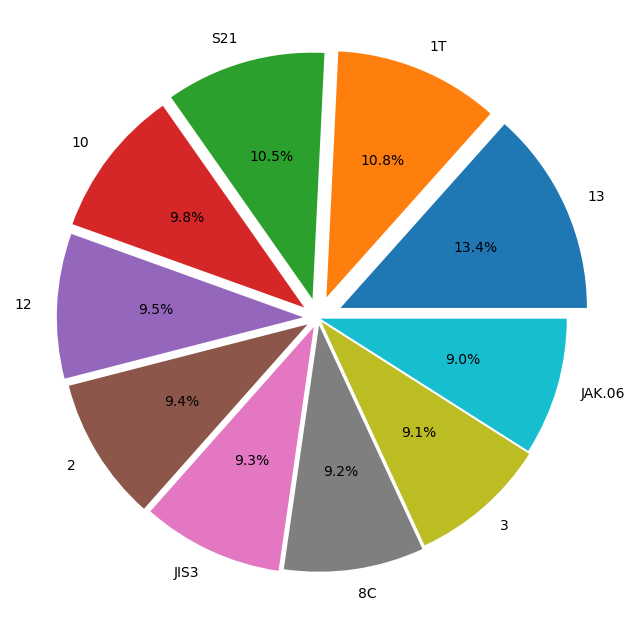

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(top_ten_corridor_df['Count'], labels=top_ten_corridor_df['Corridor ID'], autopct='%1.1f%%', explode=[(10 - i) * 0.01 for i in range(len(top_ten_corridor_df))])
plt.show()

In [47]:
fig = go.Figure()
fig.add_trace(go.Scattermapbox())

for index, stop_coordinate in enumerate(top_ten_corridor_df['Stops Coordinates']):
    fig.add_trace(go.Scattermapbox(
        mode = "markers+lines",
        name = top_ten_corridor_df['Corridor ID'][index],
        lat = [point['lat'] for point in stop_coordinate],
        lon = [point['lon'] for point in stop_coordinate],
        hovertext = [point['name'] for point in stop_coordinate],
        marker = {'color': top_ten_corridor_df['Route Color'][index], "size": 10},
    ))

fig.update_layout(
    mapbox=dict(style="carto-positron", center={'lon': 106.82418354331863, 'lat': -6.194821503352295}, zoom= 12),
    margin={'l':0,'t':0,'b':0,'r':0},
    width=1600, height=900
)

fig.show()

### **5.1.2. Least Crowded Corridor**

In [48]:
bottom_five_corridor_id = data_df['corridorID'].value_counts()[-5:]

bottom_five_corridor_df = pd.DataFrame({
    'Count': bottom_five_corridor_id.values,
    'Corridor ID': bottom_five_corridor_id.index.tolist(),
    'Corridor Name': data_df['corridorName'].value_counts()[-5:].index.tolist(),
    'Route Color': [get_route_color(corr_id) for corr_id in data_df['corridorID'].value_counts()[-5:].index.tolist()],
    'Stops Coordinates': [
        [{'lat': -6.166346658638732, 'lon': 106.79020708168694, 'name': 'Term. Grogol'}, {'lat': -6.1660799288608965, 'lon': 106.79783726920081, 'name': 'RS Sumber Waras 2'}, {'lat': -6.166379915200175, 'lon': 106.79756918366981, 'name': 'RS Sumber Waras 1'}, {'lat': -6.166451325969997, 'lon': 106.79538635285081, 'name': 'Simpang Tawakal Kyai Tapa'}, {'lat': -6.166719325787843, 'lon': 106.79105509888274, 'name': 'Univ. Trisakti 2'}, {'lat': -6.169694607143891, 'lon': 106.78867838532045, 'name': 'Univ. Tarumanegara'}, {'lat': -6.173091327700659, 'lon': 106.79115518486246, 'name': 'Gerbang Tol Tj. Duren'}, {'lat': -6.181272665901387, 'lon': 106.79254218353879, 'name': 'Jln. Tj. Duren Timur I'}, {'lat': -6.183946665711674, 'lon': 106.7922278965025, 'name': 'Kolong Pusri'}, {'lat': -6.184644698769773, 'lon': 106.7903626216347, 'name': 'Hotel Mega Anggrek'}, {'lat': -6.185531997320307, 'lon': 106.78801518486226, 'name': 'Sbr. Jln. Bima Kemanggisan'}, {'lat': -6.186428670497866, 'lon': 106.78856842163466, 'name': 'TK Yasporbi Kemanggisan'}, {'lat': -6.187039332318481, 'lon': 106.7903647774547, 'name': 'GOR Handayani Kemanggisan'}, {'lat': -6.188276667454818, 'lon': 106.79052040443875, 'name': 'Sbr. Jln. Olahraga V'}, {'lat': -6.188107333705266, 'lon': 106.79327133697869, 'name': 'Kemanggisan Ilir Gg. III'}, {'lat': -6.18798600101696, 'lon': 106.79409643883069, 'name': 'Sbr. Masjid Almukmin Kemanggisan'}, {'lat': -6.188176662195083, 'lon': 106.79554842163462, 'name': 'Wisma Rimadi Kemanggisan'}, {'lat': -6.18932156564339, 'lon': 106.79674057745471, 'name': 'Slipi Jaya'}, {'lat': -6.189526667958319, 'lon': 106.79730882904242, 'name': 'Sbr. Slipi Jaya'}, {'lat': -6.189888000669352, 'lon': 106.79631591369842, 'name': 'Ps. Slipi'}, {'lat': -6.1925793341026925, 'lon': 106.79591279465062, 'name': 'Sbr. SMPN 88'}, {'lat': -6.194814671541144, 'lon': 106.79551498115846, 'name': 'Simpang Anggrek Garuda Rosaliana'}, {'lat': -6.19433133324923, 'lon': 106.7940710155505, 'name': 'Simpang Anggrek Rosliana VII'}, {'lat': -6.1941100007941605, 'lon': 106.79264518486244, 'name': 'Sbr. KUA Palmerah'}, {'lat': -6.194373331841593, 'lon': 106.79035810020657, 'name': 'Sbr. Komplek Kijang Kencana'}, {'lat': -6.195034671643232, 'lon': 106.78940008301075, 'name': 'Airy Eco Binus'}, {'lat': -6.194897336304037, 'lon': 106.78847101555053, 'name': 'Klinik Dahlia Palmerah'}, {'lat': -6.196686670844104, 'lon': 106.78811404861881, 'name': 'Jln. KH Djunaidi Palmerah'}, {'lat': -6.198225339236907, 'lon': 106.78839445602661, 'name': 'Sbr. Jln. H. Muala Palmerah'}, {'lat': -6.19908133449269, 'lon': 106.78831862533859, 'name': 'Sbr. Kec. Palmerah'}, {'lat': -6.200386006266044, 'lon': 106.78758425232259, 'name': 'Jln. Rawa Belong 2B'}, {'lat': -6.200546672401198, 'lon': 106.78542915047073, 'name': 'Sbr. Binus Syahdan'}, {'lat': -6.201771216458376, 'lon': 106.78297011750762, 'name': 'Icon Residence'}, {'lat': -6.202588672070122, 'lon': 106.78295760225576, 'name': 'Gg. U Palmerah'}, {'lat': -6.204354004504796, 'lon': 106.78331649987778, 'name': 'Gg. T Palmerah'}, {'lat': -6.204908005633896, 'lon': 106.77953676244381, 'name': 'Sbr. Masjid Al Madinah'}, {'lat': -6.203508005336767, 'lon': 106.77916384709985, 'name': 'Simpang Jln. Salam IV'}, {'lat': -6.203522672335398, 'lon': 106.77693113545978, 'name': 'Jln. Harun II Sukabumi Utara'}, {'lat': -6.203443338328333, 'lon': 106.77478921151781, 'name': 'SDN Sukabumi Utara 03'}, {'lat': -6.203176668357598, 'lon': 106.77329696614768, 'name': 'Sbr. RS Anggrek Mas'}, {'lat': -6.2032100033204145, 'lon': 106.77166020291985, 'name': 'Jln. Madrasah Sukabumi Utara'}, {'lat': -6.209490005445951, 'lon': 106.77153081184679, 'name': 'Grha Muncul Mekar'}, {'lat': -6.208488007421019, 'lon': 106.77074133697873, 'name': 'SPBU H. Kelik'}, {'lat': -6.204932533206742, 'lon': 106.7696142933733, 'name': 'Kelapa Dua Sasak 1'}, {'lat': -6.202260007677377, 'lon': 106.76971223093226, 'name': 'YPI Al Huda Kb. Jeruk'}, {'lat': -6.200637338503187, 'lon': 106.76971810020657, 'name': 'SMAN 65'}, {'lat': -6.198720002187292, 'lon': 106.76941570999473, 'name': 'Yayasan Alkahfi Jakbar'}, {'lat': -6.1971373371619745, 'lon': 106.76817559227024, 'name': 'Gg. Mawar Kb. Jeruk'}, {'lat': -6.197309080549486, 'lon': 106.76634576784365, 'name': 'Jln. Jeruk Nipis'}, {'lat': -6.197710668007931, 'lon': 106.76504372719073, 'name': 'Simpang HH Meruya Ilir'}, {'lat': -6.199025339591941, 'lon': 106.76188821793082, 'name': 'Pos Pengampuan'}, {'lat': -6.19916933622714, 'lon': 106.7615622695186, 'name': 'Ps. Pengampuan'}, {'lat': -6.200638004569045, 'lon': 106.76078092957101, 'name': 'Jalan Nanas Lap Bola'}, {'lat': -6.201756252979875, 'lon': 106.76039930577814, 'name': 'Jln. Lapangan Bola II'}, {'lat': -6.2030828147039365, 'lon': 106.76002202111265, 'name': 'Jln. Srengseng Dalam Lap Bola'}, {'lat': -6.2031572670723705, 'lon': 106.75881128572988, 'name': 'Sbr. Jln. Duku Lap Bola'}, {'lat': -6.204270949145934, 'lon': 106.75834009747297, 'name': 'Jln. Selatan Lap Bola'}, {'lat': -6.205120944481908, 'lon': 106.75837442244405, 'name': 'Jln. Lapangan Tenis Srengseng'}, {'lat': -6.208200005055317, 'lon': 106.75932498115871, 'name': 'SMK Satria Srengseng'}, {'lat': -6.209716676104203, 'lon': 106.7593862351268, 'name': 'Jln. H. Kelik'}, {'lat': -6.210786010676638, 'lon': 106.75997101555059, 'name': 'Jln. Bambu II Srengseng'}, {'lat': -6.213726681181083, 'lon': 106.76042423927045, 'name': 'Jln. Srengseng Raya 3'}, {'lat': -6.2150705708444836, 'lon': 106.7606066294823, 'name': 'Sbr. SMAN 85'}, {'lat': -6.215765347032286, 'lon': 106.76060570999485, 'name': 'Jln. Karya Sakti Srengseng'}, {'lat': -6.217176013390211, 'lon': 106.7614875750746, 'name': 'Jln. Srengseng Raya 2'}, {'lat': -6.216920035695853, 'lon': 106.76280722190158, 'name': 'Jln. Karya Utama'}, {'lat': -6.216565347388337, 'lon': 106.7661948634344, 'name': 'Permata Eksekutif 2'}, {'lat': -6.216416026908405, 'lon': 106.76752523909737, 'name': 'Perum Villa Kelapa Dua'}, {'lat': -6.216440294369129, 'lon': 106.7705250071287, 'name': 'Jln. Kelapa Dua'}, {'lat': -6.216335548690179, 'lon': 106.7710715892301, 'name': 'Komplek Pertambangan Kelapa Dua'}, {'lat': -6.2161784301326515, 'lon': 106.77323816165607, 'name': 'Perumahan Purna Dharma'}, {'lat': -6.215598013888725, 'lon': 106.77491622020415, 'name': 'Simpang Pos Pengumben Panjang Arteri'}, {'lat': -6.213080886934655, 'lon': 106.77250223210604, 'name': 'Pos Pengumben 1'}, {'lat': -6.208537228926439, 'lon': 106.77064614347731, 'name': 'SPBU H. Kelik'}, {'lat': -6.212837343184018, 'lon': 106.77040777877832, 'name': 'Gg. Langgar Kelapa Dua'}, {'lat': -6.216476013092796, 'lon': 106.7696176927988, 'name': 'Jln. Sukabumi Selatan'}, {'lat': -6.216722004860204, 'lon': 106.76774194809052, 'name': 'Villa Kelapa Dua'}, {'lat': -6.216679341882968, 'lon': 106.76613262269177, 'name': 'Permata Eksekutif 1'}, {'lat': -6.217169965912228, 'lon': 106.76317146395809, 'name': 'Masjid Nurul Iman Joglo'}, {'lat': -6.216380673281462, 'lon': 106.76074372719063, 'name': 'Jln. Karya Sari Srengseng'}, {'lat': -6.214907343979198, 'lon': 106.7604157099949, 'name': 'SMAN 85'}, {'lat': -6.210632015438413, 'lon': 106.75953842163469, 'name': 'Sbr. Jln. Bambu II Srengseng'}, {'lat': -6.208722821729499, 'lon': 106.7592916584069, 'name': 'Sbr. SMK Satria Srengseng'}, {'lat': -6.206646999499401, 'lon': 106.75865113489596, 'name': 'Jln. Bambu I Srengseng'}, {'lat': -6.205144676335862, 'lon': 106.75897955787845, 'name': 'Jln. H. Nasir Srengseng'}, {'lat': -6.20399534600452, 'lon': 106.75854329659397, 'name': 'Sbr. Jln. Selatan Lap Bola'}, {'lat': -6.202914675300133, 'lon': 106.75873842163465, 'name': 'Jln. Duku Lap Bola'}, {'lat': -6.2030003378096135, 'lon': 106.76007208397654, 'name': 'Sbr. Jln. Srengseng Dalam'}, {'lat': -6.201487004232095, 'lon': 106.76063465231786, 'name': 'Seberang Jalan Lapangan Bola II'}, {'lat': -6.200713886493962, 'lon': 106.76081665971498, 'name': 'Sbr. Jln. Nanas Lap Bola'}, {'lat': -6.199735150710485, 'lon': 106.76089939035002, 'name': 'Jln. Blimbing III'}, {'lat': -6.199019603215754, 'lon': 106.76132958965415, 'name': 'Seberang Pasar Pengampuan'}, {'lat': -6.198134675599059, 'lon': 106.76299189150657, 'name': 'Kencana Tower Meruya Ilir'}, {'lat': -6.197708030617716, 'lon': 106.76395748674582, 'name': 'Kantor Pos Kb. Jeruk'}, {'lat': -6.1973133837028245, 'lon': 106.7655024391286, 'name': 'Jalan Jeruk Manis'}, {'lat': -6.197046730214843, 'lon': 106.76696156082345, 'name': 'Jln. Sitrun'}, {'lat': -6.200668004579926, 'lon': 106.76944530258697, 'name': 'Jln. Musyawarah Panjang Arteri'}, {'lat': -6.202998005426057, 'lon': 106.77350591369854, 'name': 'RS Anggrek Mas'}, {'lat': -6.203104665633869, 'lon': 106.77512596793328, 'name': 'Sbr. SDN Sukabumi Utara 03'}, {'lat': -6.203435312144818, 'lon': 106.77757214257225, 'name': 'Jln. H. Muhammad Sukabumi Utara'}, {'lat': -6.203296653957437, 'lon': 106.77948187537875, 'name': 'Jln. Salam IV'}, {'lat': -6.204736564125946, 'lon': 106.77968572326259, 'name': 'Masjid Al Madinah'}, {'lat': -6.202426673159916, 'lon': 106.78334299835457, 'name': 'Perumahan Perwira Mabad'}, {'lat': -6.201746816898083, 'lon': 106.7827755941843, 'name': 'Binus University'}, {'lat': -6.200735814873518, 'lon': 106.78382399336638, 'name': 'Gg. Keluarga'}, {'lat': -6.200639820260082, 'lon': 106.78490760581059, 'name': 'Binus Syahdan'}, {'lat': -6.200495828301316, 'lon': 106.7859107519758, 'name': 'Binus Syahdan 2'}, {'lat': -6.200431831862571, 'lon': 106.78698899999296, 'name': 'Jln. KH Cholil'}, {'lat': -6.199298874931579, 'lon': 106.78771153731634, 'name': 'Kec. Palmerah'}, {'lat': -6.198412236783991, 'lon': 106.78771742882344, 'name': 'Jln. H. Muala Palmerah'}, {'lat': -6.194863339201336, 'lon': 106.78804331978279, 'name': 'Sbr. Klinik Dahlia Palmerah'}, {'lat': -6.195144002964525, 'lon': 106.78908884560627, 'name': 'Sbr. Airy Eco Binus'}, {'lat': -6.194256001260536, 'lon': 106.78985431336977, 'name': 'Komplek Kijang Kencana'}, {'lat': -6.19409800334128, 'lon': 106.79222649987763, 'name': 'KUA Palmerah'}, {'lat': -6.194314668875783, 'lon': 106.79356311826385, 'name': 'Simpang Anggrek VII Rosliana'}, {'lat': -6.195006001351285, 'lon': 106.79540670358165, 'name': 'Simpang Anggrek Rosaliana Garuda'}, {'lat': -6.192869775010611, 'lon': 106.79533237267334, 'name': 'SMPN 88'}, {'lat': -6.189827334363317, 'lon': 106.79555926819502, 'name': 'Sbr. Ps. Slipi'}, {'lat': -6.189759999480591, 'lon': 106.79394028671454, 'name': 'SPBU Slipi'}, {'lat': -6.189470383904832, 'lon': 106.78933171184661, 'name': 'Jln. Kemanggisan Utama I'}, {'lat': -6.188979734094747, 'lon': 106.7879584208397, 'name': 'Sbr. Komplek Depkeu Kemanggisan Utama'}, {'lat': -6.189001337350077, 'lon': 106.78713372719054, 'name': 'Musholla Nurul Falah Kemanggisan'}, {'lat': -6.190793337149995, 'lon': 106.78649320205851, 'name': 'Jln. Kemanggisan Utama VII'}, {'lat': -6.192851922969105, 'lon': 106.78494824967571, 'name': 'Simpang Kemanggisan Ilir Raya'}, {'lat': -6.193009334241298, 'lon': 106.7840576927987, 'name': 'Sbr. Jln. Bhakti VII Palmerah'}, {'lat': -6.191910000129695, 'lon': 106.78265987930662, 'name': 'Sbr. SMAN 78'}, {'lat': -6.188273330615644, 'lon': 106.7839451848625, 'name': 'Simpang Budi Sakti Raya'}, {'lat': -6.1879733357294, 'lon': 106.78511810020652, 'name': 'Pusdiklat Pajak Jln. Sakti IV'}, {'lat': -6.188738000252555, 'lon': 106.78781591369847, 'name': 'Komplek Depkeu Kemanggisan Utama'}, {'lat': -6.189366001600641, 'lon': 106.78993935417462, 'name': 'Sbr. Kemanggisan Utama I'}, {'lat': -6.189493997153626, 'lon': 106.79460639783093, 'name': 'Anggrek Neli Murni'}, {'lat': -6.18826266956099, 'lon': 106.79048676025887, 'name': 'Jln. Olahraga V'}, {'lat': -6.18559600000645, 'lon': 106.78763404861884, 'name': 'Jln. Bima Kemanggisan'}, {'lat': -6.175979674639565, 'lon': 106.79256414315196, 'name': 'Taman Anggrek'}, {'lat': -6.172223119229921, 'lon': 106.78868656399369, 'name': 'Ukrida'}, {'lat': -6.16961198966418, 'lon': 106.78817863829042, 'name': 'Univ. Tarumanegara 2'}, {'lat': -6.166453326240441, 'lon': 106.79070060814254, 'name': 'Term. Grogol'}],
        [{'lat': -6.186825334182165, 'lon': 106.83346862533854, 'name': 'Selatan St. Gondangdia'}, {'lat': -6.186546666758217, 'lon': 106.83463299835452, 'name': 'Masjid Cut Meutia 1'}, {'lat': -6.186672806780167, 'lon': 106.83529211272968, 'name': 'BRI Menteng'}, {'lat': -6.185203907487755, 'lon': 106.83566887578618, 'name': 'Kanisius'}, {'lat': -6.182110709315354, 'lon': 106.8332787116468, 'name': 'Telkom Grapari'}, {'lat': -6.180531997280882, 'lon': 106.82684230629069, 'name': 'Perpustakaan Nasional'}],
        [{'lat': -6.1734106611677495, 'lon': 106.84253842163469, 'name': 'Terminal Senen'}, {'lat': -6.17224732764614, 'lon': 106.84304874306288, 'name': 'Kel. Senen'}, {'lat': -6.169098893363085, 'lon': 106.84274079809018, 'name': 'Bangau VI'}, {'lat': -6.1677819930464235, 'lon': 106.84220133697865, 'name': 'Simpang Gunung Sahari III'}, {'lat': -6.170007993755507, 'lon': 106.8406255062906, 'name': 'Sekolah Penabur Gunung Sahari'}, {'lat': -6.172489994274616, 'lon': 106.84164955787831, 'name': 'Gg. Buaya Senen'}, {'lat': -6.177527329661518, 'lon': 106.84258769279855, 'name': 'Ps. Senen Jaya'}, {'lat': -6.179743495925188, 'lon': 106.84075870311541, 'name': 'Jln. Kramat Kwitang'}, {'lat': -6.181598510131881, 'lon': 106.83756263802759, 'name': 'Gunung Agung'}, {'lat': -6.18209199649102, 'lon': 106.83350789650245, 'name': 'Telkom Grapari'}, {'lat': -6.180366664271295, 'lon': 106.82880186211065, 'name': 'Balai Kota 1'}, {'lat': -6.180499997853127, 'lon': 106.826466797031, 'name': 'Perpustakaan Nasional'}, {'lat': -6.18121939752965, 'lon': 106.82499739465052, 'name': 'Dana Reksa'}, {'lat': -6.183169997492387, 'lon': 106.82391655655482, 'name': 'Wisma Mandiri 2'}, {'lat': -6.183201996758619, 'lon': 106.82281148644769, 'name': 'Kementerian Agama'}, {'lat': -6.182221330083373, 'lon': 106.81864133697873, 'name': 'Sbr. Jembatan Serong'}, {'lat': -6.18250933086077, 'lon': 106.81674404861873, 'name': 'Jln. Taman Kb. Sirih'}, {'lat': -6.1845266659450795, 'lon': 106.81533842163456, 'name': 'JPO Blok E'}, {'lat': -6.182905192306904, 'lon': 106.8133168765393, 'name': 'Pharmin'}, {'lat': -6.184157336688439, 'lon': 106.81213201025992, 'name': 'Explorer Tanah Abang'}, {'lat': -6.188312707870078, 'lon': 106.81257991105312, 'name': 'Blok F'}, {'lat': -6.1895606657107685, 'lon': 106.81347040443876, 'name': 'Pospol Jati Bunder'}, {'lat': -6.18876069306292, 'lon': 106.81179670602572, 'name': 'JPO Blok G'}, {'lat': -6.1835706678788425, 'lon': 106.81197186211084, 'name': 'Transjakarta Tanah Abang 2'}, {'lat': -6.18258799802503, 'lon': 106.81346862533846, 'name': 'Jln. Taman Jatibaru Timur'}, {'lat': -6.18173269791872, 'lon': 106.8144467602588, 'name': 'Tanah Abang 2'}, {'lat': -6.181775032609354, 'lon': 106.81797948115852, 'name': 'SMKN 38'}, {'lat': -6.182090663607956, 'lon': 106.81872008301055, 'name': 'Jembatan Serong'}, {'lat': -6.183047930299278, 'lon': 106.82490853830224, 'name': 'Kementerian ESDM'}, {'lat': -6.1828533331519, 'lon': 106.82608955787838, 'name': 'Masjid Ar Rayyan Kementerian BUMN'}, {'lat': -6.182807998104739, 'lon': 106.82773372719058, 'name': 'Dewan Pers'}, {'lat': -6.182712000228703, 'lon': 106.82897827216559, 'name': 'DPRD DKI Jakarta'}, {'lat': -6.182520004416009, 'lon': 106.83140298912164, 'name': 'Sbr. MNC Center'}, {'lat': -6.180994665138952, 'lon': 106.83737853935895, 'name': 'Panti Perwira'}, {'lat': -6.177215329928303, 'lon': 106.84115457375086, 'name': 'Atrium 1'}, {'lat': -6.176265996065364, 'lon': 106.84050477745464, 'name': 'RSPAD 1'}, {'lat': -6.169667993352674, 'lon': 106.83972623512672, 'name': 'Wahidin 1'}, {'lat': -6.169794659960997, 'lon': 106.84068987930651, 'name': 'Sekolah Penabur Gunung Sahari'}, {'lat': -6.172404661166811, 'lon': 106.8414349811585, 'name': 'Gg. Buaya Senen'}, {'lat': -6.173325328208247, 'lon': 106.84271008301056, 'name': 'Terminal Senen'}],
        [{'lat': -6.182027331354814, 'lon': 106.90908582764911, 'name': 'Pulo Gadung 5'}, {'lat': -6.182128001263599, 'lon': 106.91196346920538, 'name': 'Warung Jengkol'}, {'lat': -6.182202666362238, 'lon': 106.91318655648485, 'name': 'Jln. Kesadaran Pool Bus 1'}, {'lat': -6.182309330771153, 'lon': 106.91516066234283, 'name': 'Jln. Kesadaran Pool Bus 2'}, {'lat': -6.182373329405841, 'lon': 106.91670561469584, 'name': 'Sbr. PTC Pulo Gadung'}, {'lat': -6.182533325958651, 'lon': 106.9188835683602, 'name': 'Sbr. IGI'}, {'lat': -6.182938356360592, 'lon': 106.92328683459259, 'name': 'Jln. Gg. Swadaya IV'}, {'lat': -6.183623008966146, 'lon': 106.92374489923606, 'name': 'Al-Wathoniyah'}, {'lat': -6.1864336013911885, 'lon': 106.92351422926669, 'name': 'Jln. Swadaya IVJln. Swadaya IV'}, {'lat': -6.18932733414608, 'lon': 106.92398518478134, 'name': 'Jln. Radjiman Widyodiningrat'}, {'lat': -6.190299999617736, 'lon': 106.92364477737942, 'name': 'Jln. Radjiman 2'}, {'lat': -6.192580000306155, 'lon': 106.92351445594568, 'name': 'Jln. Yamaha Pintu II'}, {'lat': -6.194696206722979, 'lon': 106.92327110382563, 'name': 'Pasar Pulo Jaya'}, {'lat': -6.200206506164078, 'lon': 106.92281166203645, 'name': 'Pangarengan'}, {'lat': -6.2033593375531675, 'lon': 106.92329477737972, 'name': 'Masjid Al-Marzuqiyah'}, {'lat': -6.204969903289348, 'lon': 106.9240136093773, 'name': 'Jln. Anggrek Raya'}, {'lat': -6.2075190668105105, 'lon': 106.92336987923021, 'name': 'Seberang Jln. Rawabadung'}, {'lat': -6.212868243169906, 'lon': 106.92438783875205, 'name': 'Gg. H. Sayuti 1'}, {'lat': -6.218489101391211, 'lon': 106.9241732620435, 'name': 'Carrefour Buaran'}, {'lat': -6.21908734555958, 'lon': 106.92399259087217, 'name': 'SMKN 48'}, {'lat': -6.220655200519561, 'lon': 106.9248938130781, 'name': 'Budhaya Santo Agustinus'}, {'lat': -6.2219137474039785, 'lon': 106.92355270861076, 'name': 'Kasi Dikdas 2'}, {'lat': -6.2239188836615265, 'lon': 106.92466850753569, 'name': 'Gedung Senam'}, {'lat': -6.23203801597244, 'lon': 106.92309060806602, 'name': 'Wira Purusa'}, {'lat': -6.234992332573416, 'lon': 106.92323008293123, 'name': 'Rukan Radin Inten II'}, {'lat': -6.236090864826904, 'lon': 106.92373433821311, 'name': 'Masjid An Nur Khadijah'}, {'lat': -6.2455440073026365, 'lon': 106.92048372711011, 'name': 'Kwk Unkermil Timur II'}, {'lat': -6.2472918610729495, 'lon': 106.92066310066419, 'name': 'Simpang Radin Inten II Kalimalang'}, {'lat': -6.247259865704537, 'lon': 106.92219732418144, 'name': 'Pondok Kelapa Indah'}, {'lat': -6.247483833257786, 'lon': 106.92486880441133, 'name': 'Curug Kalimalang'}, {'lat': -6.247793121604724, 'lon': 106.92669270649478, 'name': 'Kav Marinir Kalimalang'}, {'lat': -6.247931768056049, 'lon': 106.92975042487721, 'name': 'Billy Moon 2'}, {'lat': -6.2481130748850395, 'lon': 106.9310486140072, 'name': 'Billy Moon'}, {'lat': -6.248752980847462, 'lon': 106.93576930183224, 'name': 'Pondok Kelapa Raya Kalimalang'}, {'lat': -6.248944952488042, 'lon': 106.939706784623, 'name': 'Jln. Klp. Hijau'}, {'lat': -6.249780017660348, 'lon': 106.93966664245332, 'name': 'Jln. Inspeksi Kalimalang Lampiri'}, {'lat': -6.249278759047339, 'lon': 106.93600810945064, 'name': 'Jln. Pondok Kelapa Selatan'}, {'lat': -6.248660183924429, 'lon': 106.93025745330458, 'name': 'Kapin'}, {'lat': -6.2485641980659405, 'lon': 106.9293884175629, 'name': 'Embun Pagi Islamic Elementary School'}, {'lat': -6.24835089609568, 'lon': 106.92597664772067, 'name': 'Sekolah Pami Jaya'}, {'lat': -6.248062938286481, 'lon': 106.92339099822895, 'name': 'Jln. Curug Raya Kalimalang'}, {'lat': -6.24742669136355, 'lon': 106.9228227945735, 'name': 'Sbr. Pondok Kelapa Indah 2'}, {'lat': -6.2475100169686355, 'lon': 106.92166186203664, 'name': 'Sbr. Pondok Kelapa Indah'}, {'lat': -6.246957356297844, 'lon': 106.9200925908725, 'name': 'SMK Swadaya Global School'}, {'lat': -6.241596688994446, 'lon': 106.92111550621568, 'name': 'SPBU Raden Intan II'}, {'lat': -6.2402102061584745, 'lon': 106.92220984746575, 'name': 'Taman Duren Sawit'}, {'lat': -6.238183801568439, 'lon': 106.92279993343392, 'name': 'Simpang Jln. 26 Selatan'}, {'lat': -6.238092209058374, 'lon': 106.92243782796795, 'name': 'Simpang Jln. 26 Utara'}, {'lat': -6.235287732977283, 'lon': 106.9229984853732, 'name': 'Sbr. Rukan Radin Inten II'}, {'lat': -6.232063469336524, 'lon': 106.92332706927962, 'name': 'Sbr. Wira Purusa'}, {'lat': -6.226733480436222, 'lon': 106.92319683667954, 'name': 'Jln. H. Aman'}, {'lat': -6.223176015914754, 'lon': 106.92370643875222, 'name': 'Wisma Atlet Radin Inten'}, {'lat': -6.222232006170039, 'lon': 106.92358769272278, 'name': 'Kasi Dikdas 1'}, {'lat': -6.219542685962025, 'lon': 106.92375550621549, 'name': 'Dinas Kebersihan Duren Sawit'}, {'lat': -6.212535345569104, 'lon': 106.92401425224462, 'name': 'Sbr. Gg. H. Sayuti I'}, {'lat': -6.208791626369176, 'lon': 106.92315594538181, 'name': 'Jln. Rawabadung'}, {'lat': -6.204994550556405, 'lon': 106.92300574168192, 'name': 'Sbr. Jln. Anggrek Raya'}, {'lat': -6.199995539193063, 'lon': 106.92263330473045, 'name': 'Rajiman 2'}, {'lat': -6.1949786151636355, 'lon': 106.92241292284262, 'name': 'Pulo Jaya'}, {'lat': -6.190180244657396, 'lon': 106.92334093254054, 'name': 'Jln. Radjiman 1'}, {'lat': -6.1879279617613845, 'lon': 106.92353028670004, 'name': 'SDN Rawa Terate'}, {'lat': -6.183920891481897, 'lon': 106.92402395999788, 'name': 'Sbr. Al-Wathoniyah'}, {'lat': -6.18288550258188, 'lon': 106.91911427751448, 'name': 'IGI'}, {'lat': -6.182644160120528, 'lon': 106.91656159543501, 'name': 'PTC Pulo Gadung 1'}, {'lat': -6.18249789609894, 'lon': 106.91151048574686, 'name': 'Makam Wakaf'}],
        [{'lat': -6.185265333491185, 'lon': 106.81132358229388, 'name': 'Transjakarta Tanah Abang 1'}, {'lat': -6.182438667926018, 'lon': 106.81305556510019, 'name': 'Jln. Taman Jatibaru Timur'}, {'lat': -6.182900731739238, 'lon': 106.8130500902513, 'name': 'Pharmin'}, {'lat': -6.184216002631019, 'lon': 106.81210591909448, 'name': 'Explorer Tanah Abang'}, {'lat': -6.188450210118727, 'lon': 106.8124906391604, 'name': 'Blok F'}, {'lat': -6.188507811457774, 'lon': 106.813382080361, 'name': 'Tanah Abang Blok G'}, {'lat': -6.189581998297231, 'lon': 106.81377617620325, 'name': 'Pospol Jati Bunder'}, {'lat': -6.18931733416819, 'lon': 106.81185285345826, 'name': 'Bongkaran Tanah Abang'}, {'lat': -6.188577333859192, 'lon': 106.81017518478146, 'name': 'Jln. Petamburan KS Tubun'}, {'lat': -6.188644668655228, 'lon': 106.80897664245303, 'name': 'Hotel Kalisma KS Tubun'}, {'lat': -6.190251432156083, 'lon': 106.80676777367847, 'name': 'Gg. Petamburan I KS Tubun'}, {'lat': -6.191548673774503, 'lon': 106.80662664245311, 'name': 'Gg. Ramli KS Tubun'}, {'lat': -6.192791999046107, 'lon': 106.80670798239173, 'name': 'Sbr. RS Pelni Petamburan'}, {'lat': -6.194146003597352, 'lon': 106.80560676018585, 'name': 'DPP FPI'}, {'lat': -6.1959966705398966, 'lon': 106.80554789642376, 'name': 'Sekolah Bethel KS Tubun'}, {'lat': -6.198610668235845, 'lon': 106.80367425224469, 'name': 'Sbr. Sekolah Lamuel'}, {'lat': -6.199788004234538, 'lon': 106.80132186203649, 'name': 'Sbr. RS Bhakti Mulia'}, {'lat': -6.201443902985022, 'lon': 106.80029398717117, 'name': 'Slipi Petamburan 1'}, {'lat': -6.202631335396696, 'lon': 106.79861060806581, 'name': 'Sbr. Jln. Palmerah Utara II'}, {'lat': -6.205427340313936, 'lon': 106.79716789642382, 'name': 'Sbr. SDN Palmerah 07'}, {'lat': -6.207575343363624, 'lon': 106.79403477737945, 'name': 'The Jakarta Post'}, {'lat': -6.207718655685207, 'lon': 106.79297164593032, 'name': 'Ps. Pisang'}, {'lat': -6.207424680780974, 'lon': 106.79113997374759, 'name': 'Sbr. Ps. Bintang Mas'}, {'lat': -6.208329339157918, 'lon': 106.78977643875214, 'name': 'Kel. Grogol Utara'}, {'lat': -6.2074933455498424, 'lon': 106.78838769272275, 'name': 'Sbr. SDN Palmerah 09'}, {'lat': -6.206749338647643, 'lon': 106.78631206573746, 'name': 'Jln. Kemandoran III Grogol Utara'}, {'lat': -6.206599338599226, 'lon': 106.78439737128893, 'name': 'Simpang Palmerah Barat Rawa Belong'}, {'lat': -6.207952013949533, 'lon': 106.7840288289606, 'name': 'Jln. Kemandoran VI Grogol Utara'}, {'lat': -6.209466572636996, 'lon': 106.78396445594589, 'name': 'Jln. Kemandoran VII Grogol Utara'}, {'lat': -6.210810473177092, 'lon': 106.78391081176696, 'name': 'Jln. Kemandoran VIII Grogol Utara'}, {'lat': -6.21316762380402, 'lon': 106.78228002872575, 'name': 'Sbr. Jln. Asshofa Raya'}, {'lat': -6.213290725362074, 'lon': 106.7794656983218, 'name': 'Sbr. Jln. Ee Sukabumi Selatan'}, {'lat': -6.213441607382705, 'lon': 106.77754684702677, 'name': 'Sbr. Jln. Ww Sukabumi Selatan'}, {'lat': -6.21356533847979, 'lon': 106.77574427415787, 'name': 'Yayasan Al Fakhriyyah'}, {'lat': -6.215142683646308, 'lon': 106.77483550621544, 'name': 'Simpang Panjang Arteri Madrasah I'}, {'lat': -6.21632653623742, 'lon': 106.77448625224478, 'name': 'Halte STM Cendrawasin'}, {'lat': -6.216507853988384, 'lon': 106.77088136342105, 'name': 'Sbr. Komplek Pertambangan Kelapa Dua'}, {'lat': -6.2167680104070815, 'lon': 106.77030445594592, 'name': 'Pospol Pengumben'}, {'lat': -6.217660007895719, 'lon': 106.77022133690171, 'name': 'Kel. Sukabumi Selatan'}, {'lat': -6.218542005275325, 'lon': 106.77055259087244, 'name': 'Simpang Z Sukabumi Selatan 1'}, {'lat': -6.218425348190398, 'lon': 106.77165247313954, 'name': 'Sbr. Gg. H. Amsar'}, {'lat': -6.219106014184354, 'lon': 106.77236008293112, 'name': 'Jln. H. Sholeh IA'}, {'lat': -6.219942005614741, 'lon': 106.77243226943855, 'name': 'Jln. H. Sholeh I'}, {'lat': -6.2211757807132875, 'lon': 106.77247808215908, 'name': 'Jln. H. Abdullah'}, {'lat': -6.22230468429243, 'lon': 106.7723022694387, 'name': 'Jln. H. Muhajar'}, {'lat': -6.22359522401294, 'lon': 106.77206623505143, 'name': 'Jln. H. Daud'}, {'lat': -6.224737347732649, 'lon': 106.77243538848263, 'name': 'Jln. Kampung Baru Permai'}, {'lat': -6.225341357941985, 'lon': 106.7727661173556, 'name': 'Simpang Kampung Baru Assirat'}, {'lat': -6.225461341389783, 'lon': 106.77575704985514, 'name': 'Sbr. Jln. Assirot Dalam'}, {'lat': -6.225376016850546, 'lon': 106.77696940829885, 'name': 'ln. Al Islamiyah Grogol Selatan'}, {'lat': -6.225290692297428, 'lon': 106.77794573235528, 'name': 'Masjid Jami As Shiroth'}, {'lat': -6.226453238144619, 'lon': 106.77902934479893, 'name': 'Sbr. Kimia Farma Grogol Utara'}, {'lat': -6.2274984606512085, 'lon': 106.77890059876951, 'name': 'Sbr. Komplek Kemhan Cidodol'}, {'lat': -6.228778322139209, 'lon': 106.7790508025098, 'name': 'Sbr. SDN Grogol Selatan 01'}, {'lat': -6.23140202837676, 'lon': 106.78029534746085, 'name': 'TPU Grogol Selatan'}, {'lat': -6.233474444293684, 'lon': 106.78108641001195, 'name': 'Sbr. SMPN 48'}, {'lat': -6.235596021202096, 'lon': 106.78116081176707, 'name': 'Ruko Ps. Kebayoran Lama'}, {'lat': -6.235634670855043, 'lon': 106.7828178104556, 'name': 'St. Kebayoran 2'}],
    ]
})

bottom_five_corridor_df[['Corridor ID', 'Corridor Name', 'Count']]

,Corridor ID,Corridor Name,Count
0,JAK.53,Grogol - Pos Pengumben via Slipi,42
1,2Q,Gondangdia - Balai Kota,41
2,1R,Senen - Tanah Abang,41
3,JAK.99,Term. Pulo Gadung - Lampiri,31
4,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,24


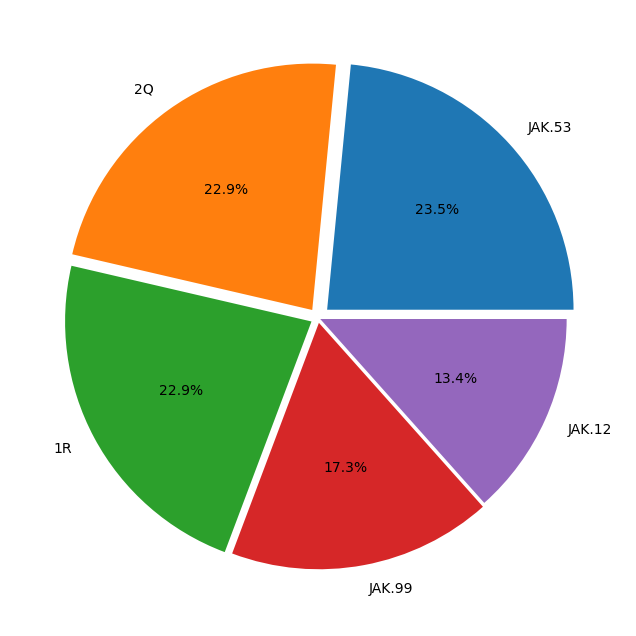

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(bottom_five_corridor_df['Count'], labels=bottom_five_corridor_df['Corridor ID'], autopct='%1.1f%%', explode=[(5 - i) * 0.01 for i in range(len(bottom_five_corridor_df))])
plt.show()

In [224]:
fig = go.Figure()
fig.add_trace(go.Scattermapbox())

for index, stop_coordinate in enumerate(bottom_five_corridor_df['Stops Coordinates']):
    fig.add_trace(go.Scattermapbox(
        mode = "markers+lines",
        name = bottom_five_corridor_df['Corridor ID'][index],
        lat = [point['lat'] for point in stop_coordinate],
        lon = [point['lon'] for point in stop_coordinate],
        hovertext = [point['name'] for point in stop_coordinate],
        marker = {'color': bottom_five_corridor_df['Route Color'][index], "size": 10},
    ))

fig.update_layout(
    mapbox=dict(style="carto-positron", center={'lon': 106.82418354331863, 'lat': -6.194821503352295}, zoom= 12),
    margin={'l':0,'t':0,'b':0,'r':0},
    width=1600, height=900
)

fig.show()

### **5.1.3. Insights related to Corridor**

- As the most crowded corridor, there are 9 TransJakarta service and 1 JakLingko service. Meanwhile as the least crowded corridor, there are 2 TransJakarta service and 3 JakLingko service.
- There are 9 services as the most crowded corridor that connects regional parts of Jakarta, such as:
    - Corridor 13&emsp;&emsp;&emsp;&ensp;:&nbsp;Tangerang - South Jakarta
    - Corridor 1T&emsp;&emsp;&emsp;&ensp;:&nbsp;East Jakarta - Central Jakarta
    - Corridor S21&emsp;&emsp;&emsp;:&nbsp;South Tangerang - South Jakarta
    - Corridor 10&emsp;&emsp;&emsp;&ensp;:&nbsp;East Jakarta - North Jakarta
    - Corridor 2&emsp;&emsp;&emsp;&emsp;:&nbsp;North Jakarta - Central Jakarta
    - Corridor JIS3&emsp;&emsp;&ensp;:&nbsp;Central Jakarta - North Jakarta
    - Corridor 8C&emsp;&emsp;&emsp;&nbsp;:&nbsp;South Jakarta - Central Jakarta
    - Corridor 3&emsp;&emsp;&emsp;&emsp;:&nbsp;West Jakarta - Central Jakarta
    - Corridor JAK.06&emsp;&nbsp;:&nbsp;East Jakarta - Bekasi
- As one of the least crowded corridor, corridor 2Q has the shortest route and overlapped with corridor 1R in 2 bus stops.

## **5.2. Related to Geographical**

### **5.2.1. Data Scrapping for Bus Stops Location**

**Stops Location Data**

NJ : North Jakarta      
EJ : East Jakarta       
CJ : Central Jakarta        
SJ : South Jakarta      
D : Depok       
B : Bekasi      
ST : South Tangerang

In [65]:
stops_location_df = pd.DataFrame({
    'stops_name':pd.concat([data_df['tapInStopsName'], data_df['tapOutStopsName']]).drop_duplicates().reset_index(drop=True).value_counts().index.sort_values(),
    'location': "",
})

stops_location_df

,stops_name,location
0,18 Office Park,
1,ABA,
2,ACC Simatupang,
3,ACE Hardware,
4,AKR Tower,
...,...,...
3626,Yayasan Perguruan Rakyat 2,
3627,Yon Arhanud - 10 Pesanggrahan,
3628,Yos Sudarso Kodamar,
3629,Yos Sudarso Kodamar 1,


In [107]:
def findBusStopRegion(stopName):
    # Get Bus Stops lat and lon
    isUseTapInData = False
    try:
        isUseTapInData = True
        data = data_df[data_df['tapInStopsName'] == stopName].reset_index().iloc[0]
    except:
        isUseTapInData = False
        data = data_df[data_df['tapOutStopsName'] == stopName].reset_index().iloc[0]
    
    coordinate = f"{data['tapInStopsLat'] if isUseTapInData else data['tapOutStopsLat']}, {data['tapInStopsLon'] if isUseTapInData else data['tapOutStopsLon']}"

    driver = webdriver.Chrome()
    driver.get("https://www.google.com/maps?hl=en")

    # Locate search field, enter lat, lon
    search = driver.find_element(By.ID, 'searchboxinput')
    search.click()
    search.send_keys(coordinate)

    # Locate submit button, press click
    submit_button = driver.find_element(By.ID, 'searchbox-searchbutton')
    submit_button.click()

    # Set wait
    wait = WebDriverWait(driver, 10)

    # Address result
    address = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'DkEaL')))
    region = ""

    if "Bekasi" in address.text:
        region = "B"
    elif "South Jakarta City" in address.text:
        region = "SJ"
    elif "North Jakarta City" in address.text:
        region = "NJ"
    elif "East Jakarta City" in address.text:
        region = "EJ"
    elif "Central Jakarta City" in address.text:
        region = "CJ"
    elif "South Tangerang" in address.text:
        region = "ST"
    elif "Tangerang City" in address.text:
        region = "T"
    elif "Tangerang Regency" in address.text:
        region = "T"
    elif "West Jakarta City" in address.text:
        region = "WJ"
    elif "Depok City" in address.text:
        region = "D"
    
    driver.quit()
    
    return region

In [78]:
for (index, stop) in enumerate(stops_location_df['stops_name'][3495:], start=3495):
    print(f"Processing index :: {index} for stop name :: {stop}")
    stops_location_df.iloc[index]['location'] = findBusStopRegion(stop)
    print(f"✅ {index}th index processed successfully")

Processing index :: 3495 for stop name :: Term. Kampung Rambutan
✅ 3495th index processed successfully
Processing index :: 3496 for stop name :: Term. Klender
✅ 3496th index processed successfully
Processing index :: 3497 for stop name :: Term. Kota Intan
✅ 3497th index processed successfully
Processing index :: 3498 for stop name :: Term. Muara Angke 1
✅ 3498th index processed successfully
Processing index :: 3499 for stop name :: Term. Muara Angke 2
✅ 3499th index processed successfully
Processing index :: 3500 for stop name :: Term. Pasar Minggu
✅ 3500th index processed successfully
Processing index :: 3501 for stop name :: Term. Pasar Minggu 2
✅ 3501th index processed successfully
Processing index :: 3502 for stop name :: Term. Pinang Ranti
✅ 3502th index processed successfully
Processing index :: 3503 for stop name :: Term. Poris Plawad
✅ 3503th index processed successfully
Processing index :: 3504 for stop name :: Term. Ragunan
✅ 3504th index processed successfully
Processing ind

In [110]:
stops_location_df['location'].value_counts()

location
EJ    1117
SJ     868
NJ     623
WJ     478
CJ     380
B       59
ST      43
D       32
T       31
Name: count, dtype: int64

**Export data into CSV**

In [ ]:
stops_location_df['location'].value_counts()

stops_location_df.to_csv('./dataset/tj_stops_region.csv', index=False)

### **5.2.2. Most Crowded Bus Stops Region**

In [112]:
tap_in_df = data_df.groupby(['tapInStopsName']).size().reset_index(name='Count').sort_values(by="Count", ascending=False)
tap_in_df = tap_in_df.merge(stops_location_df, left_on='tapInStopsName', right_on='stops_name', how='left')
tap_in_df = tap_in_df.drop(columns=['stops_name'])

tap_in_df

,tapInStopsName,Count,location
0,Penjaringan,243,NJ
1,Garuda Taman Mini,208,EJ
2,BKN,173,EJ
3,BNN LRT,155,EJ
4,Pejaten,152,SJ
...,...,...,...
2597,SDN Rawamangun 05,1,EJ
2598,SDN Ragunan 14,1,SJ
2599,Jln. Bulak Barat V Klender,1,EJ
2600,SDN Pondok Kelapa 05,1,EJ


In [114]:
tap_out_df = data_df.groupby(['tapOutStopsName']).size().reset_index(name='Count').sort_values(by="Count", ascending=False)
tap_out_df = tap_out_df.merge(stops_location_df, left_on='tapOutStopsName', right_on='stops_name', how='left')
tap_out_df = tap_out_df.drop(columns=['stops_name'])

tap_out_df

,tapOutStopsName,Count,location
0,BKN,316,EJ
1,Penjaringan,265,NJ
2,Term. Senen,196,CJ
3,Monas,167,CJ
4,Term. Kampung Rambutan,164,EJ
...,...,...,...
2243,Menteng 1,1,CJ
2244,Jln. Pinang VI Pondok Labu,1,SJ
2245,Sbr. Ps. Palmerah,1,WJ
2246,Jln. Bambu Hubuny,1,EJ


In [392]:
regional_count_df = pd.DataFrame({
    'location': tap_in_df['location'].value_counts().index.sort_values(),
    'count': (tap_in_df.groupby('location')['Count'].sum() + tap_out_df.groupby('location')['Count'].sum()).values,
    'coords': [[-6.239143549560463, 106.96959738175339], [-6.180604779407399, 106.8220235318325], [-6.401494378232454, 106.79307751086877], [-6.22325878751959, 106.89403080349999], [-6.148002371492412, 106.89219653380599],
                [-6.246908855860859, 106.806588212864], [-6.2878866745889965, 106.71087052161347], [-6.174647474361844, 106.63045071522232], [-6.167676452348303, 106.76172194508882]],
    'full_name': ['Bekasi', 'Central Jakarta', 'Depok', 'East Jakarta', 'North Jakarta', 'South Jakarta', 'South Tangerang', 'Tangerang', 'West Jakarta'],
    'color': ["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan", "lime"]
})

regional_count_df[['location', 'count']].sort_values(by='count', ascending=False)

,location,count
5,SJ,21057
3,EJ,20926
1,CJ,10953
4,NJ,10729
8,WJ,7483
0,B,1090
6,ST,981
7,T,706
2,D,531


In [364]:
fig = go.Figure()
fig.add_trace(go.Scattermapbox())

for region in regional_count_df.iterrows():
    fig.add_trace(go.Scattermapbox(
        mode='markers',
        name = region[1]['full_name'],
        lat = [region[1]['coords'][0]],
        lon = [region[1]['coords'][1]],
        hovertext = [f"Passenger count: {region[1]['count']}"],
        marker = {
            'color': region[1]['color'],
            'size': ((region[1]['count'] - regional_count_df['count'].min()) / (regional_count_df['count'].max() - regional_count_df['count'].min()) * 200) + 150,
            'opacity': 0.3
        }
    ))

fig.update_layout(
    mapbox=dict(style="carto-positron", center={'lon': 106.80589891464348, 'lat': -6.259875049537947}, zoom= 11),
    margin={'l':0,'t':0,'b':0,'r':0},
    width=1600, height=900
)

fig.show()

### **5.2.3. Most Crowded Bus Stops Across Region**

In [ ]:
data_df['tapInRegion'] = data_df['tapInStopsName'].map(
    stops_location_df.set_index('stops_name')['location']
)

data_df['tapOutRegion'] = data_df['tapOutStopsName'].map(
    stops_location_df.set_index('stops_name')['location']
)

data_df['tapInOutRegion'] = data_df['tapInRegion'].astype(str) + '-' + data_df['tapOutRegion'].astype(str)

In [292]:
data_df['tapInOutRegion'].value_counts()

tapInOutRegion
EJ-EJ     9029
SJ-SJ     8589
NJ-NJ     4427
CJ-CJ     3486
WJ-WJ     2840
SJ-CJ      750
CJ-SJ      725
SJ-EJ      463
CJ-NJ      448
EJ-SJ      414
CJ-EJ      399
SJ-nan     379
EJ-CJ      366
EJ-nan     363
WJ-CJ      352
CJ-WJ      344
B-B        307
WJ-NJ      291
ST-ST      282
NJ-CJ      271
EJ-NJ      238
SJ-WJ      220
B-EJ       208
CJ-nan     206
NJ-WJ      198
NJ-nan     187
NJ-EJ      181
T-T        173
ST-SJ      154
SJ-ST      145
WJ-nan     142
EJ-B       128
WJ-SJ      124
SJ-T       114
D-D        103
T-SJ        98
SJ-D        90
D-SJ        64
D-EJ        60
CJ-T        60
SJ-B        49
B-SJ        49
D-ST        47
ST-WJ       39
WJ-T        31
EJ-WJ       30
T-WJ        23
SJ-NJ       22
CJ-D        20
B-nan       20
D-CJ        19
ST-nan      19
T-CJ        19
NJ-SJ       19
NJ-B        18
D-nan       14
T-nan       14
WJ-EJ        9
ST-D         7
EJ-D         4
EJ-ST        4
B-NJ         2
CJ-B         2
ST-T         1
ST-EJ        1
Name: coun

### **5.2.4. Population Distribution**

In [371]:
population_df = {
    'EJ': 3300000, 'WJ': 2600000, 'CJ': 1103357,
    'SJ': 2400000, 'NJ': 1801963, 'B': 2530000,
    'ST': 1429529, 'D': 2056400, 'T': 1957349,
}

In [390]:
pd.DataFrame({
    'region': [region[1]['location'] for region in regional_count_df.iterrows()],
    'percentage': [region[1]['count'] / population_df[region[1]['location']] * 100 for region in regional_count_df.iterrows()],
}).sort_values(by='percentage', ascending=False)

,region,percentage
1,CJ,0.992698
5,SJ,0.877375
3,EJ,0.634121
4,NJ,0.595406
8,WJ,0.287808
6,ST,0.068624
0,B,0.043083
7,T,0.036069
2,D,0.025822


### **5.2.5. Insights related to Geographical**

- Most of the passengers use TransJakarta service to commute within the same region, with East Jakarta having the top passengers count
- Central Jakarta region has the highest percentage of population that use TransJakarta service, even though the count of tap in and tap out in this region ranked 3rd in most tap
- 

## **5.3. Related to Time**

### **5.3.1. Time Mapping**

Timing will be divided into several categories, such as:
- Weekday morning&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;::&emsp;**5.01 AM - 7.00 AM** and **9.01 AM - 12.00 PM**&emsp;[WDM]
- Weekday morning rush hour&emsp;&ensp;::&emsp;**7.01 AM - 9.00 AM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;[WDMR]
- Weekday lunch hour&emsp;&emsp;&emsp;&emsp;&emsp;::&emsp;**12.01 PM - 1.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[WDL]
- Weekday afternoon&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;::&emsp;**1.01 PM - 5.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;[WDA]
- Weekday evening rush hour&emsp;&ensp;::&emsp;**5.01 PM - 7.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[WDER]
- Weekend evening&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;::&emsp;**7.01 PM - 10.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;[WDE]
- Weekday night service&emsp;&emsp;&emsp;&emsp;::&emsp;**10.01 PM - 5.00 AM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[WDNS]
- Weekend morning&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;::&emsp;**5.01 AM - 12.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[WEM]
- Weekend lunch hour&emsp;&emsp;&emsp;&emsp;&emsp;::&emsp;**12.01 PM - 1.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;[WEL]
- Weekend afternoon&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;::&emsp;**1.01 PM - 5.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;[WEA]
- Weekend evening&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;::&emsp;**5.01 PM - 10.00 PM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[WEE]
- Weekend night service&emsp;&emsp;&emsp;&emsp;&nbsp;::&emsp;**10.01 PM - 5.00 AM**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[WENS]

In [469]:
def getTimeMapping(x):
    if pd.isna(x):
        return None
    
    data = x.split(" ")
    day = datetime.strptime(data[0], "%Y-%m-%d").isoweekday()
    time = data[1]
    
    datetime_mapping = ""
        
    if day < 5:
        if (time > "05:00:01" and time < "07:00:00") or (time > "09:00:01" and time < "12:00:00"):
            datetime_mapping = "WDM"
        elif (time > "07:00:01" and time < "09:00:00"):
            datetime_mapping = "WDMR"
        elif (time > "12:00:01" and time < "13:00:00"):
            datetime_mapping = "WDL"
        elif (time > "13:00:01" and time < "17:00:00"):
            datetime_mapping = "WDA"
        elif (time > "17:00:01" and time < "19:00:00"):
            datetime_mapping = "WDER"
        elif (time > "19:00:01" and time < "22:00:00"):
            datetime_mapping = "WDE"
        elif (time > "22:00:01" or time < "05:00:00"):
            datetime_mapping = "WDNS"
    else:
        if (time > "05:00:01" and time < "12:00:00"):
            datetime_mapping = "WEM"
        elif (time > "12:00:01" and time < "13:00:00"):
            datetime_mapping = "WEL"
        elif (time > "13:00:01" and time < "17:00:00"):
            datetime_mapping = "WEA"
        elif (time > "17:00:01" and time < "22:00:00"):
            datetime_mapping = "WEE"
        elif (time > "22:00:01" or time < "05:00:00"):
            datetime_mapping = "WENS"
            
    return datetime_mapping

In [470]:
data_df['tapInMapping'] = data_df['tapInTime'].apply(getTimeMapping)
data_df['tapOutMapping'] = data_df['tapOutTime'].apply(getTimeMapping)

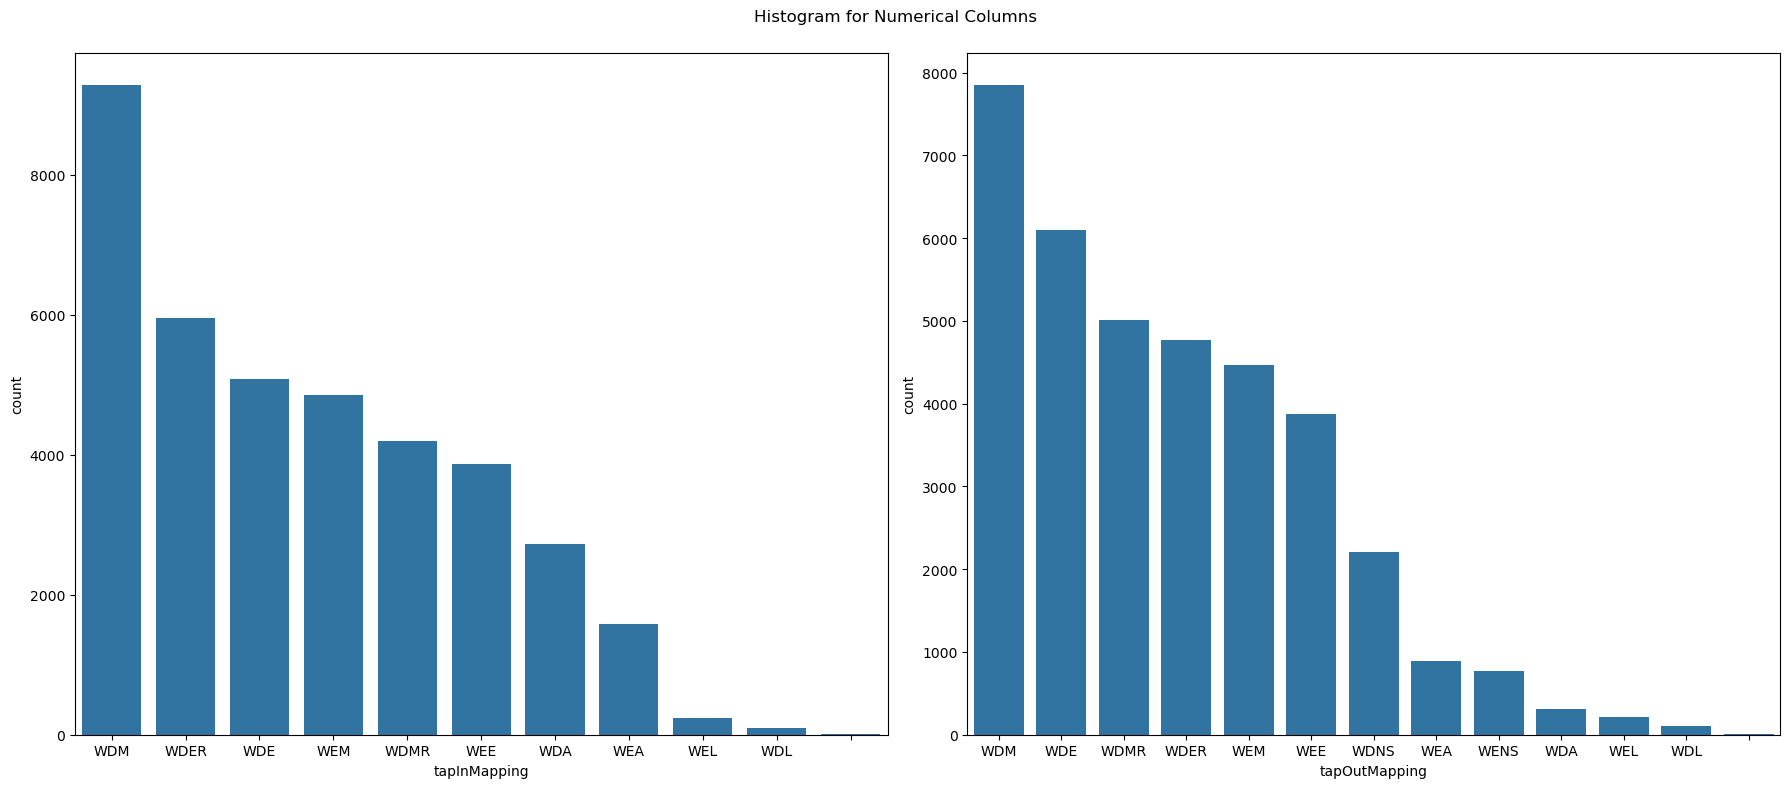

In [503]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes = axes.flatten()

tapInOrder = data_df['tapInMapping'].value_counts().index
sns.countplot(x=data_df['tapInMapping'], ax=axes[0], order=tapInOrder)

tapInOrder = data_df['tapOutMapping'].value_counts().index
sns.countplot(x=data_df['tapOutMapping'], ax=axes[1], order=tapInOrder)

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Histogram for Numerical Columns")
plt.show()

### **5.3.2. Bus Stops**

### **5.3.3. Bus Corridor**

### **5.3.3. Insights related to Time**

abc

## **5.4. Related to Gender**

## **5.5. Related to Payment**

### **5.5.1. Pay Amount**

### **5.5.2. Pay Cards**